<a href="https://colab.research.google.com/github/mirzab/ml/blob/main/Paper_2_Photonics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic data for optical communication
num_samples = 1000

# Features related to optical communication
signal_power = np.random.uniform(0.5, 2.5, num_samples)
wavelength = np.random.uniform(1300, 1550, num_samples)
fiber_length = np.random.uniform(10, 50, num_samples)
modulation_format = np.random.choice(['QPSK', '16-QAM', '64-QAM'], num_samples)
noise_level = np.random.uniform(0.1, 0.5, num_samples)

# Simulate a target variable indicating the communication state (e.g., Good or Bad)
# You can customize this based on your specific classification scenario
communication_state = np.random.choice(['Good', 'Bad'], num_samples)

# Create a synthetic dataset
synthetic_data = pd.DataFrame({
    'Signal_Power_dBm': signal_power,
    'Wavelength_nm': wavelength,
    'Fiber_Length_km': fiber_length,
    'Modulation_Format': modulation_format,
    'Noise_Level_dB': noise_level,
    'Communication_State': communication_state
})

# Display the synthetic dataset
print("Synthetic Optical Communication Data:")
print(synthetic_data.head())

# Data preprocessing
X = synthetic_data.drop(['Communication_State'], axis=1)
y = synthetic_data['Communication_State']

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = Pipeline(steps=[('num', 'passthrough')])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Build a RandomForestClassifier
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print('\nModel Evaluation:')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_str)

# Cross-validate the model (optional)
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print('\nCross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', np.mean(cv_scores))

# Save the synthetic dataset to a CSV file
synthetic_data.to_csv('synthetic_optical_communication_data.csv', index=False)


Synthetic Optical Communication Data:
   Signal_Power_dBm  Wavelength_nm  Fiber_Length_km Modulation_Format  \
0          1.249080    1346.283232        20.468227            64-QAM   
1          2.401429    1435.475237        19.879152              QPSK   
2          1.963988    1518.236459        46.250183              QPSK   
3          1.697317    1483.056222        19.981848            64-QAM   
4          0.812037    1501.640287        20.877989            16-QAM   

   Noise_Level_dB Communication_State  
0        0.350529                 Bad  
1        0.211388                Good  
2        0.441193                 Bad  
3        0.471353                 Bad  
4        0.498559                Good  

Model Evaluation:
Accuracy: 0.47
Classification Report:
               precision    recall  f1-score   support

         Bad       0.51      0.51      0.51       107
        Good       0.43      0.43      0.43        93

    accuracy                           0.48       200
   macr

Synthetic Optical Communication Data:
   Signal_Power_dBm  Wavelength_nm  Fiber_Length_km Modulation_Format  \
0          1.249080    1346.283232        20.468227            64-QAM   
1          2.401429    1435.475237        19.879152              QPSK   
2          1.963988    1518.236459        46.250183              QPSK   
3          1.697317    1483.056222        19.981848            64-QAM   
4          0.812037    1501.640287        20.877989            16-QAM   

   Noise_Level_dB Communication_State  
0        0.350529                 Bad  
1        0.211388                Good  
2        0.441193                 Bad  
3        0.471353                 Bad  
4        0.498559                Good  

Model Evaluation:
Accuracy: 0.47
Classification Report:
               precision    recall  f1-score   support

         Bad       0.51      0.51      0.51       107
        Good       0.43      0.43      0.43        93

    accuracy                           0.48       200
   macr

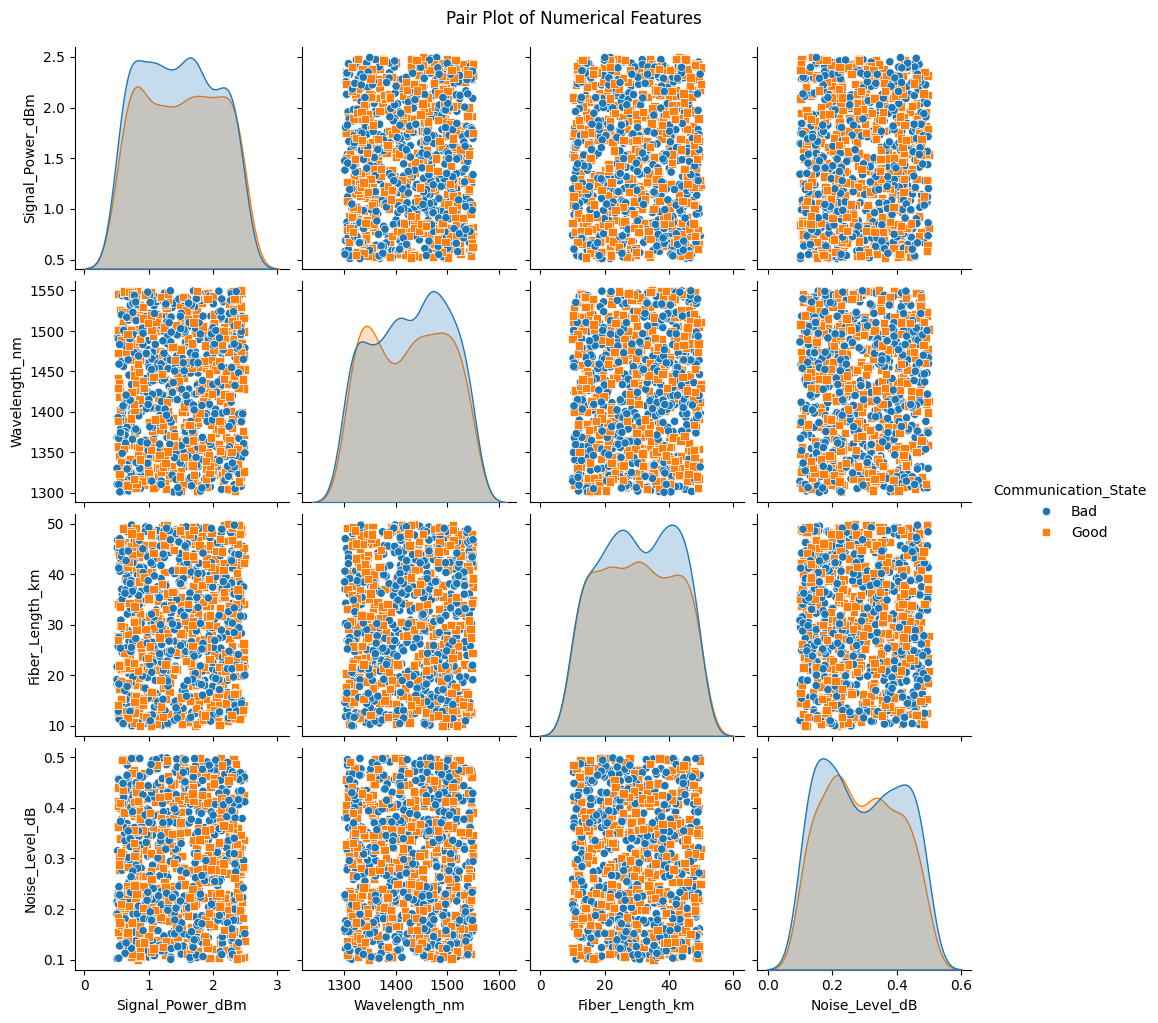

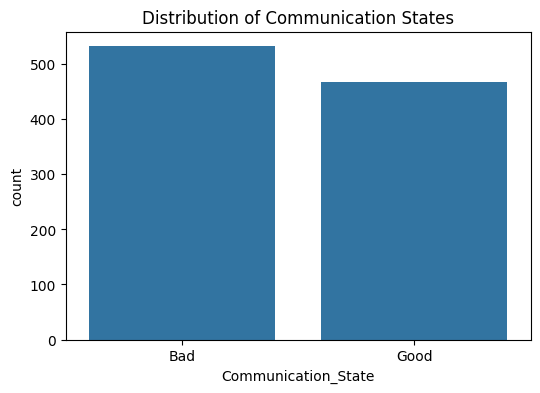

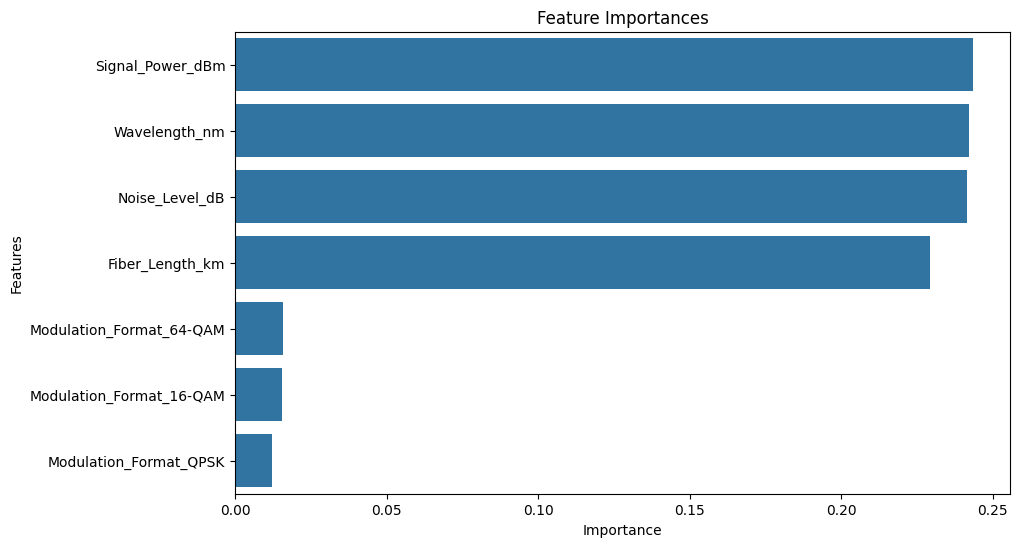

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic data for optical communication
num_samples = 1000
signal_power = np.random.uniform(0.5, 2.5, num_samples)
wavelength = np.random.uniform(1300, 1550, num_samples)
fiber_length = np.random.uniform(10, 50, num_samples)
modulation_format = np.random.choice(['QPSK', '16-QAM', '64-QAM'], num_samples)
noise_level = np.random.uniform(0.1, 0.5, num_samples)
communication_state = np.random.choice(['Good', 'Bad'], num_samples)

# Create a synthetic dataset
synthetic_data = pd.DataFrame({
    'Signal_Power_dBm': signal_power,
    'Wavelength_nm': wavelength,
    'Fiber_Length_km': fiber_length,
    'Modulation_Format': modulation_format,
    'Noise_Level_dB': noise_level,
    'Communication_State': communication_state
})

# Display the synthetic dataset
print("Synthetic Optical Communication Data:")
print(synthetic_data.head())

# Data preprocessing
X = synthetic_data.drop(['Communication_State'], axis=1)
y = synthetic_data['Communication_State']

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = Pipeline(steps=[('num', 'passthrough')])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Build a RandomForestClassifier
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print('\nModel Evaluation:')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_str)

# Save the synthetic dataset to a CSV file
synthetic_data.to_csv('synthetic_optical_communication_data.csv', index=False)

# Create a pair plot for numerical features
numerical_cols_to_plot = ['Signal_Power_dBm', 'Wavelength_nm', 'Fiber_Length_km', 'Noise_Level_dB']
sns.pairplot(synthetic_data[numerical_cols_to_plot + ['Communication_State']], hue='Communication_State', markers=["o", "s"])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Create a count plot for the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Communication_State', data=synthetic_data)
plt.title('Distribution of Communication States')
plt.show()

# Extract feature importances from the trained model
feature_importances = rf_model.named_steps['classifier'].feature_importances_

# Get one-hot encoded feature names
one_hot_feature_names = rf_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)

# Combine numerical and one-hot encoded feature names
all_feature_names = np.concatenate([numerical_cols, one_hot_feature_names])

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort features based on importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Synthetic Optical Communication Data:
   Signal_Power_dBm  Wavelength_nm  Fiber_Length_km Modulation_Format  \
0          1.249080    1346.283232        20.468227            64-QAM   
1          2.401429    1435.475237        19.879152              QPSK   
2          1.963988    1518.236459        46.250183              QPSK   
3          1.697317    1483.056222        19.981848            64-QAM   
4          0.812037    1501.640287        20.877989            16-QAM   

   Noise_Level_dB Communication_State  
0        0.350529                 Bad  
1        0.211388                Good  
2        0.441193                 Bad  
3        0.471353                 Bad  
4        0.498559                Good  

Model Evaluation:
Accuracy: 0.47
Classification Report:
               precision    recall  f1-score   support

         Bad       0.51      0.51      0.51       107
        Good       0.43      0.43      0.43        93

    accuracy                           0.48       200
   macr

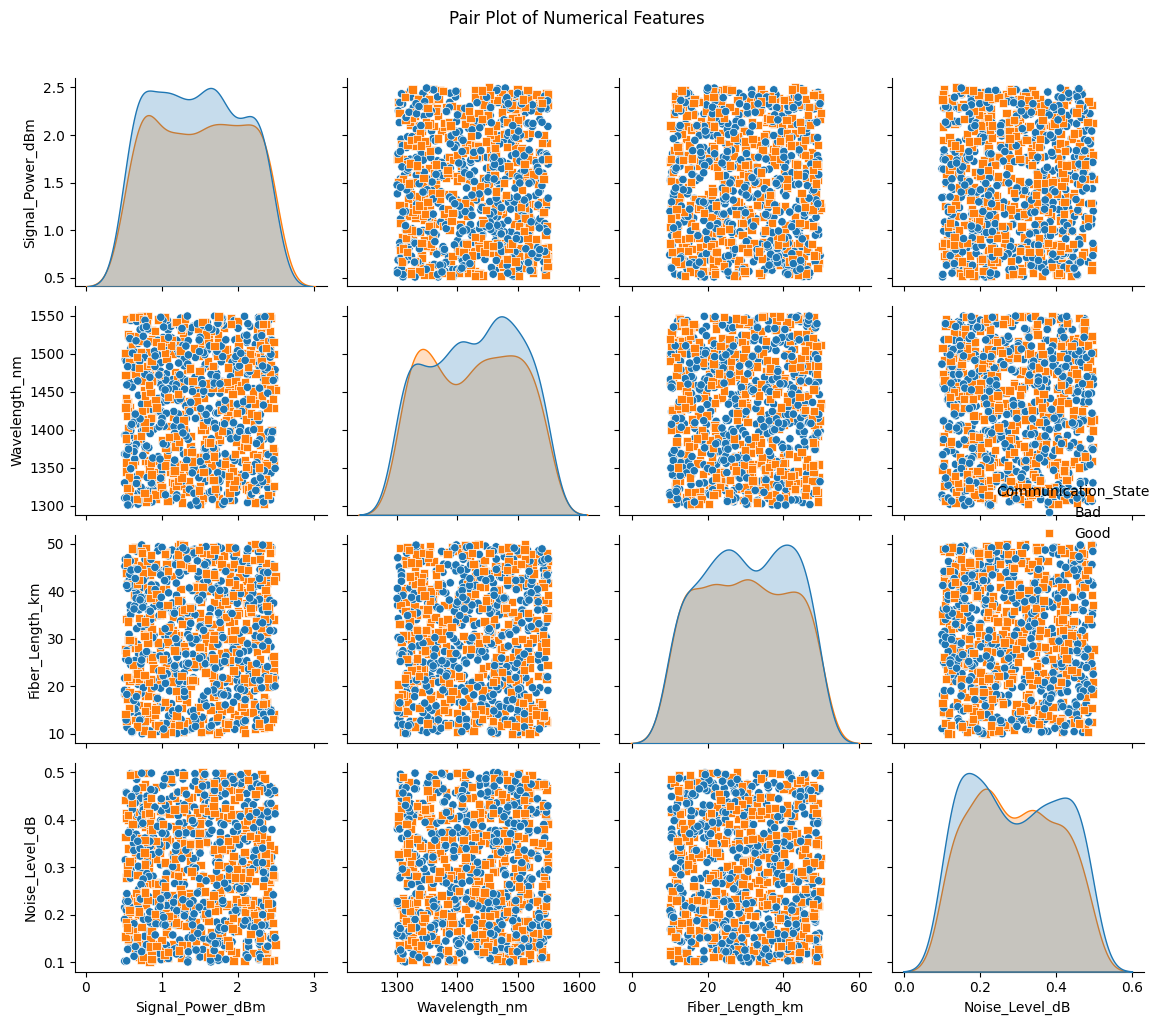

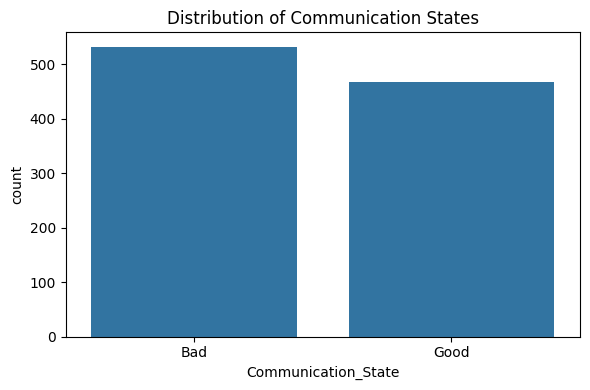

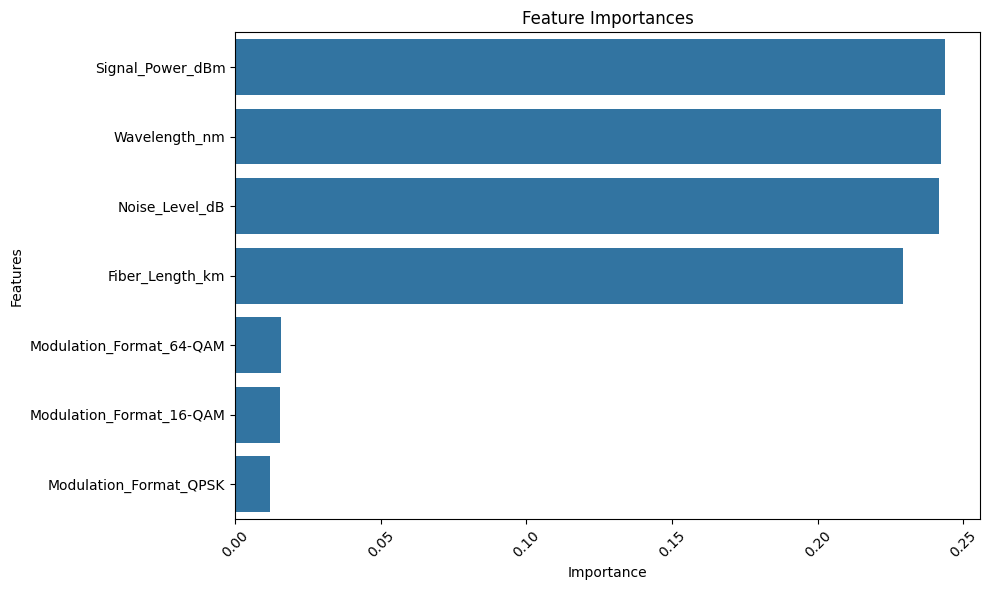

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic data for optical communication
num_samples = 1000
signal_power = np.random.uniform(0.5, 2.5, num_samples)
wavelength = np.random.uniform(1300, 1550, num_samples)
fiber_length = np.random.uniform(10, 50, num_samples)
modulation_format = np.random.choice(['QPSK', '16-QAM', '64-QAM'], num_samples)
noise_level = np.random.uniform(0.1, 0.5, num_samples)
communication_state = np.random.choice(['Good', 'Bad'], num_samples)

# Create a synthetic dataset
synthetic_data = pd.DataFrame({
    'Signal_Power_dBm': signal_power,
    'Wavelength_nm': wavelength,
    'Fiber_Length_km': fiber_length,
    'Modulation_Format': modulation_format,
    'Noise_Level_dB': noise_level,
    'Communication_State': communication_state
})

# Display the synthetic dataset
print("Synthetic Optical Communication Data:")
print(synthetic_data.head())

# Data preprocessing
X = synthetic_data.drop(['Communication_State'], axis=1)
y = synthetic_data['Communication_State']

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = Pipeline(steps=[('num', 'passthrough')])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Build a RandomForestClassifier
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print('\nModel Evaluation:')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_str)

# Save the synthetic dataset to a CSV file
synthetic_data.to_csv('synthetic_optical_communication_data.csv', index=False)

# Create a pair plot for numerical features
numerical_cols_to_plot = ['Signal_Power_dBm', 'Wavelength_nm', 'Fiber_Length_km', 'Noise_Level_dB']
sns.pairplot(synthetic_data[numerical_cols_to_plot + ['Communication_State']], hue='Communication_State', markers=["o", "s"])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

# Create a count plot for the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Communication_State', data=synthetic_data)
plt.title('Distribution of Communication States')
plt.tight_layout()
plt.show()

# Extract feature importances from the trained model
feature_importances = rf_model.named_steps['classifier'].feature_importances_

# Get one-hot encoded feature names
one_hot_feature_names = rf_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)

# Combine numerical and one-hot encoded feature names
all_feature_names = np.concatenate([numerical_cols, one_hot_feature_names])

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort features based on importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


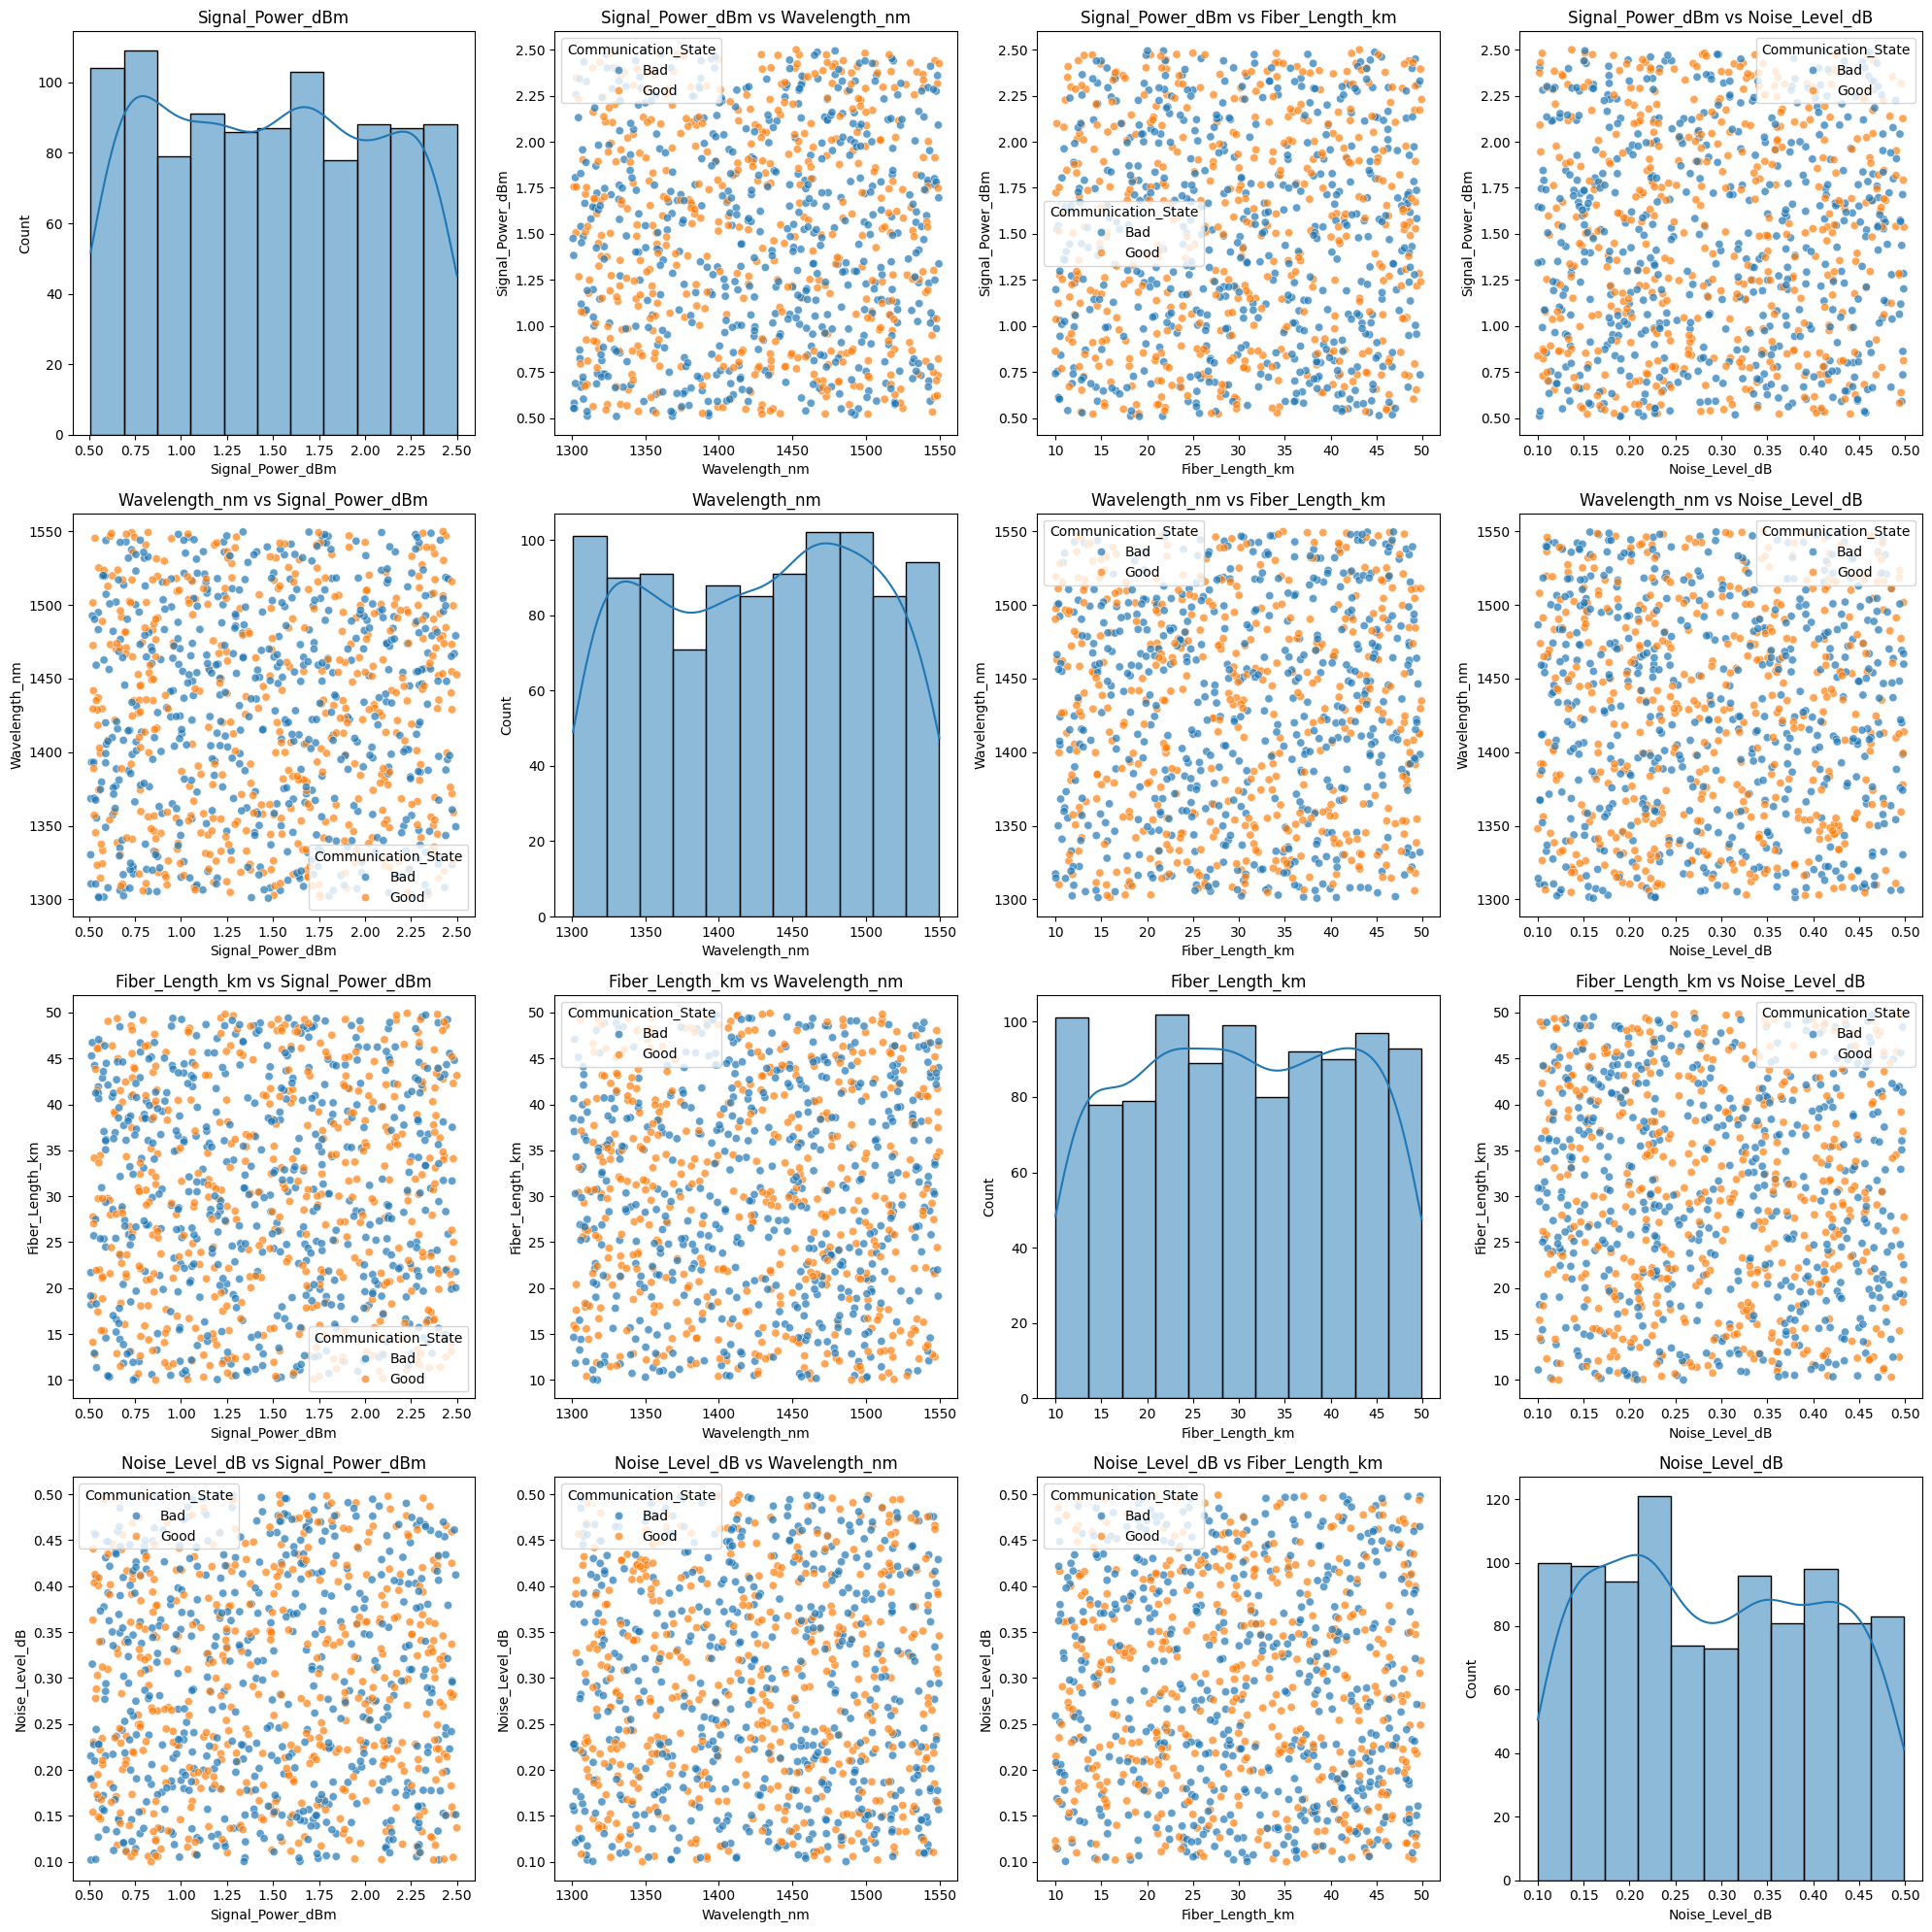

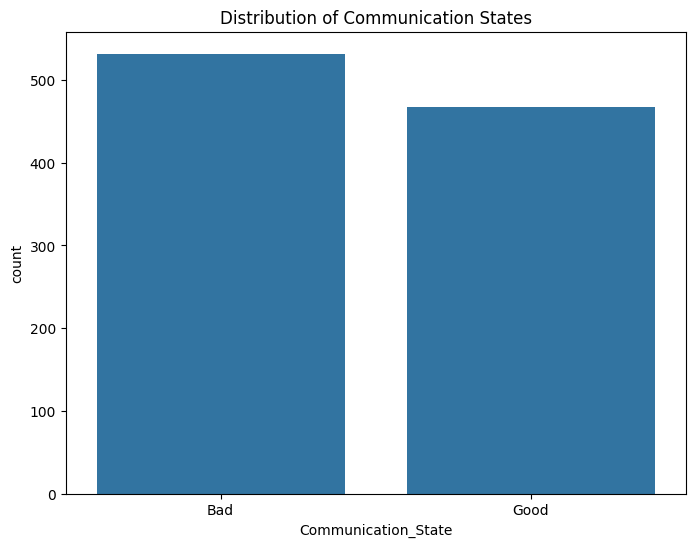

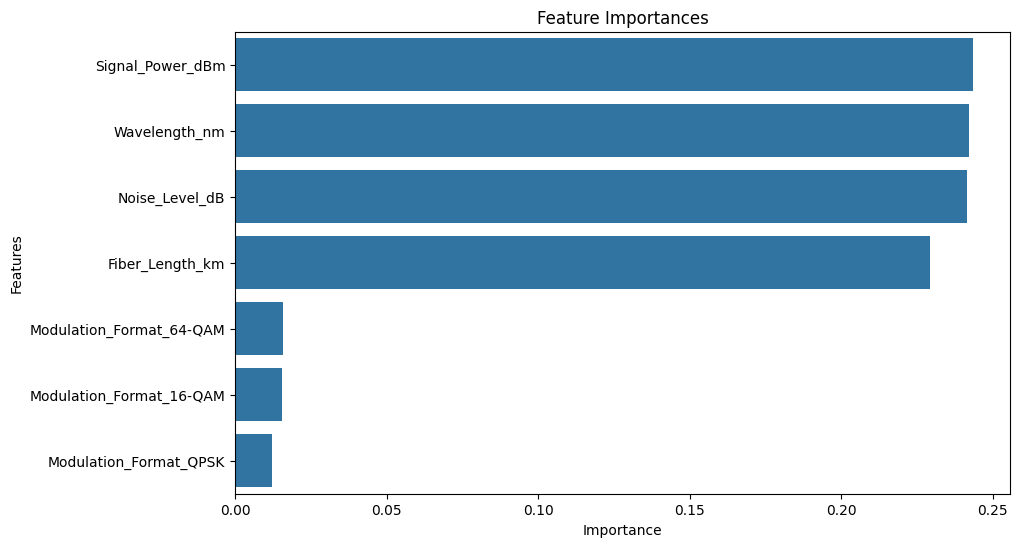

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# ... (rest of the code remains the same)

# Create a pair plot for numerical features
numerical_cols_to_plot = ['Signal_Power_dBm', 'Wavelength_nm', 'Fiber_Length_km', 'Noise_Level_dB']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Create pair plots for each pair of numerical features
for i in range(4):
    for j in range(4):
        if i == j:
            # Diagonal plots - Histograms
            sns.histplot(synthetic_data[numerical_cols_to_plot[i]], kde=True, ax=axes[i, j])
            axes[i, j].set_title(numerical_cols_to_plot[i])
        else:
            # Scatter plots for off-diagonal
            sns.scatterplot(x=numerical_cols_to_plot[j], y=numerical_cols_to_plot[i], hue='Communication_State',
                            data=synthetic_data, ax=axes[i, j], markers=["o", "s"], alpha=0.7)
            axes[i, j].set_title(f'{numerical_cols_to_plot[i]} vs {numerical_cols_to_plot[j]}')

# Adjust layout
plt.tight_layout()
plt.show()

# Create a count plot for the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Communication_State', data=synthetic_data)
plt.title('Distribution of Communication States')
plt.show()

# Extract feature importances from the trained model
feature_importances = rf_model.named_steps['classifier'].feature_importances_

# Get one-hot encoded feature names
one_hot_feature_names = rf_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)

# Combine numerical and one-hot encoded feature names
all_feature_names = np.concatenate([numerical_cols, one_hot_feature_names])

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort features based on importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()




Synthetic Optical Communication Data:
   Signal_Power_dBm  Wavelength_nm  Fiber_Length_km Modulation_Format  \
0          1.249080    1346.283232        20.468227            64-QAM   
1          2.401429    1435.475237        19.879152              QPSK   
2          1.963988    1518.236459        46.250183              QPSK   
3          1.697317    1483.056222        19.981848            64-QAM   
4          0.812037    1501.640287        20.877989            16-QAM   

   Noise_Level_dB Communication_State  
0        0.350529                 Bad  
1        0.211388                Good  
2        0.441193                 Bad  
3        0.471353                 Bad  
4        0.498559                Good  

Model Evaluation:
Accuracy: 0.47
Classification Report:
               precision    recall  f1-score   support

         Bad       0.51      0.51      0.51       107
        Good       0.43      0.43      0.43        93

    accuracy                           0.48       200
   macr

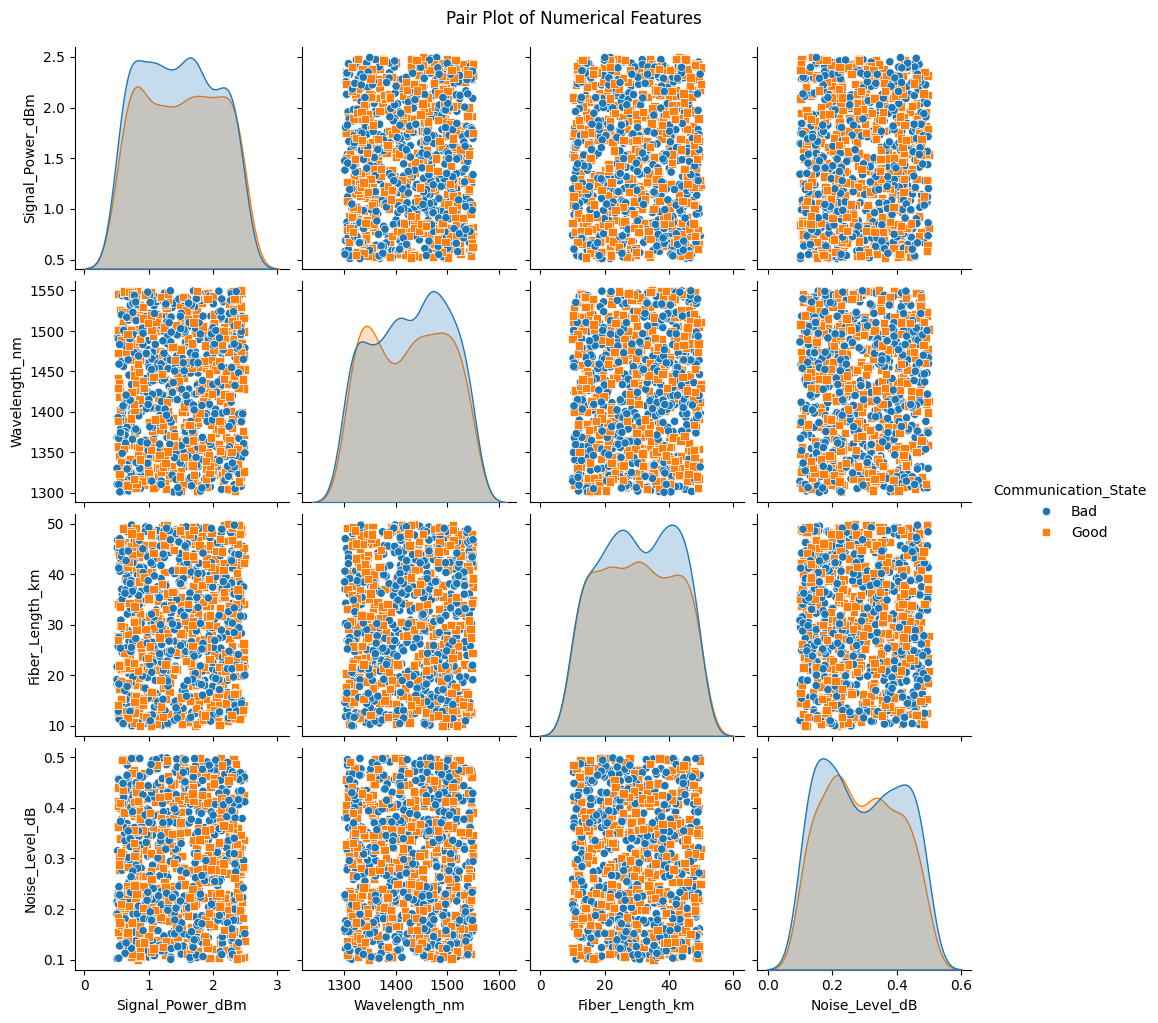

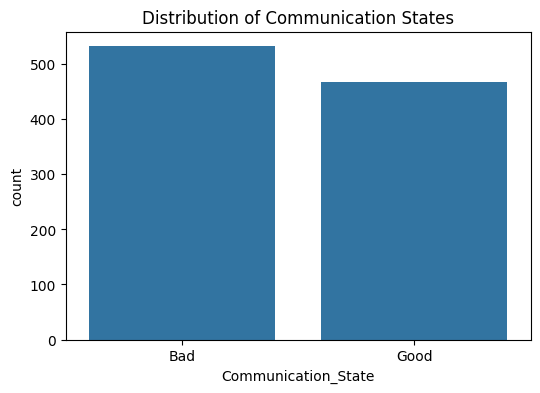

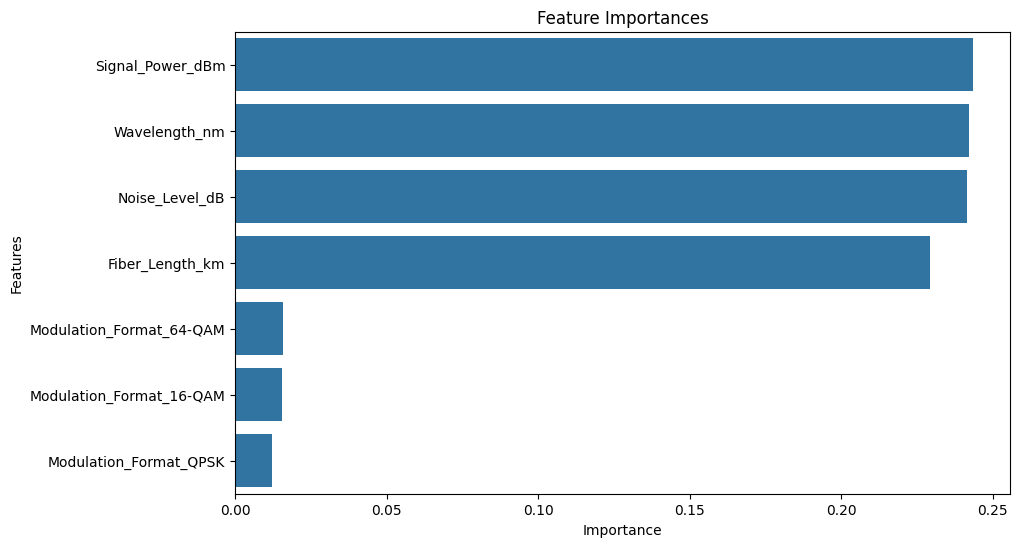

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic data for optical communication
num_samples = 1000

# Features related to optical communication
signal_power = np.random.uniform(0.5, 2.5, num_samples)
wavelength = np.random.uniform(1300, 1550, num_samples)
fiber_length = np.random.uniform(10, 50, num_samples)
modulation_format = np.random.choice(['QPSK', '16-QAM', '64-QAM'], num_samples)
noise_level = np.random.uniform(0.1, 0.5, num_samples)

# Simulate a target variable indicating the communication state (e.g., Good or Bad)
# You can customize this based on your specific classification scenario
communication_state = np.random.choice(['Good', 'Bad'], num_samples)

# Create a synthetic dataset
synthetic_data = pd.DataFrame({
    'Signal_Power_dBm': signal_power,
    'Wavelength_nm': wavelength,
    'Fiber_Length_km': fiber_length,
    'Modulation_Format': modulation_format,
    'Noise_Level_dB': noise_level,
    'Communication_State': communication_state
})

# Display the synthetic dataset
print("Synthetic Optical Communication Data:")
print(synthetic_data.head())

# Data preprocessing
X = synthetic_data.drop(['Communication_State'], axis=1)
y = synthetic_data['Communication_State']

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns  # Define categorical_cols

# Create transformers
numerical_transformer = Pipeline(steps=[('num', 'passthrough')])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Build a RandomForestClassifier
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print('\nModel Evaluation:')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_str)

# Cross-validate the model (optional)
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print('\nCross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', np.mean(cv_scores))

# Save the synthetic dataset to a CSV file
synthetic_data.to_csv('synthetic_optical_communication_data.csv', index=False)

# Create a pair plot for numerical features
numerical_cols_to_plot = ['Signal_Power_dBm', 'Wavelength_nm', 'Fiber_Length_km', 'Noise_Level_dB']
sns.pairplot(synthetic_data[numerical_cols_to_plot + ['Communication_State']], hue='Communication_State', markers=["o", "s"])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Create a count plot for the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Communication_State', data=synthetic_data)
plt.title('Distribution of Communication States')
plt.show()

# Extract feature importances from the trained model
feature_importances = rf_model.named_steps['classifier'].feature_importances_

# Get one-hot encoded feature names
one_hot_feature_names = rf_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)

# Combine numerical and one-hot encoded feature names
all_feature_names = np.concatenate([numerical_cols, one_hot_feature_names])

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort features based on importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
# Save results to a file
results_file_path = 'optical_communication_results.txt'

with open(results_file_path, 'w') as results_file:
    # Save synthetic dataset
    results_file.write("Synthetic Optical Communication Data:\n")
    results_file.write(synthetic_data.to_string(index=False) + "\n\n")

    # Save model evaluation metrics
    results_file.write("Model Evaluation:\n")
    results_file.write(f'Accuracy: {accuracy:.2f}\n')
    results_file.write('Classification Report:\n')
    results_file.write(classification_report_str + "\n")

    # Save cross-validation scores
    results_file.write("\nCross-Validation Scores:")
    results_file.write(str(cv_scores) + "\n")
    results_file.write(f'Mean Cross-Validation Score: {np.mean(cv_scores)}\n')

    # Save feature importances
    results_file.write("\nFeature Importances:\n")
    results_file.write(importance_df.to_string(index=False) + "\n")

    # Append a line indicating where the visualizations are saved
    results_file.write("\nVisualizations are saved in separate files.")

# Additional lines to save visualizations (uncomment if needed)
plt.savefig('pair_plot.png')
plt.savefig('count_plot.png')
plt.savefig('feature_importances_plot.png')


<Figure size 640x480 with 0 Axes>

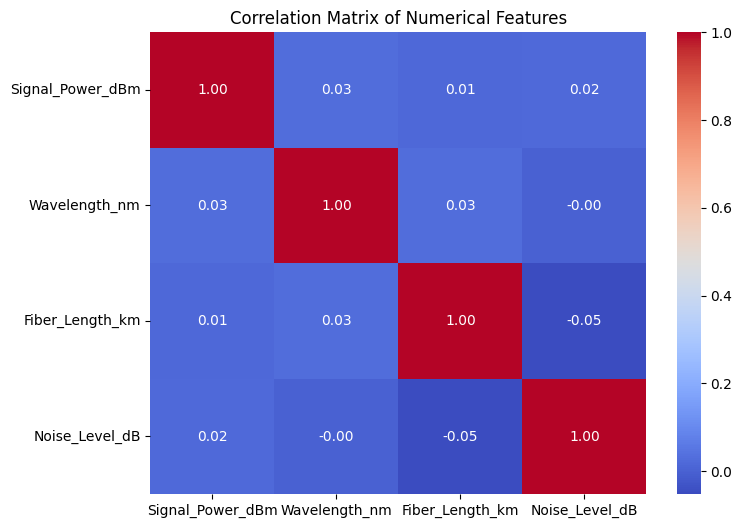

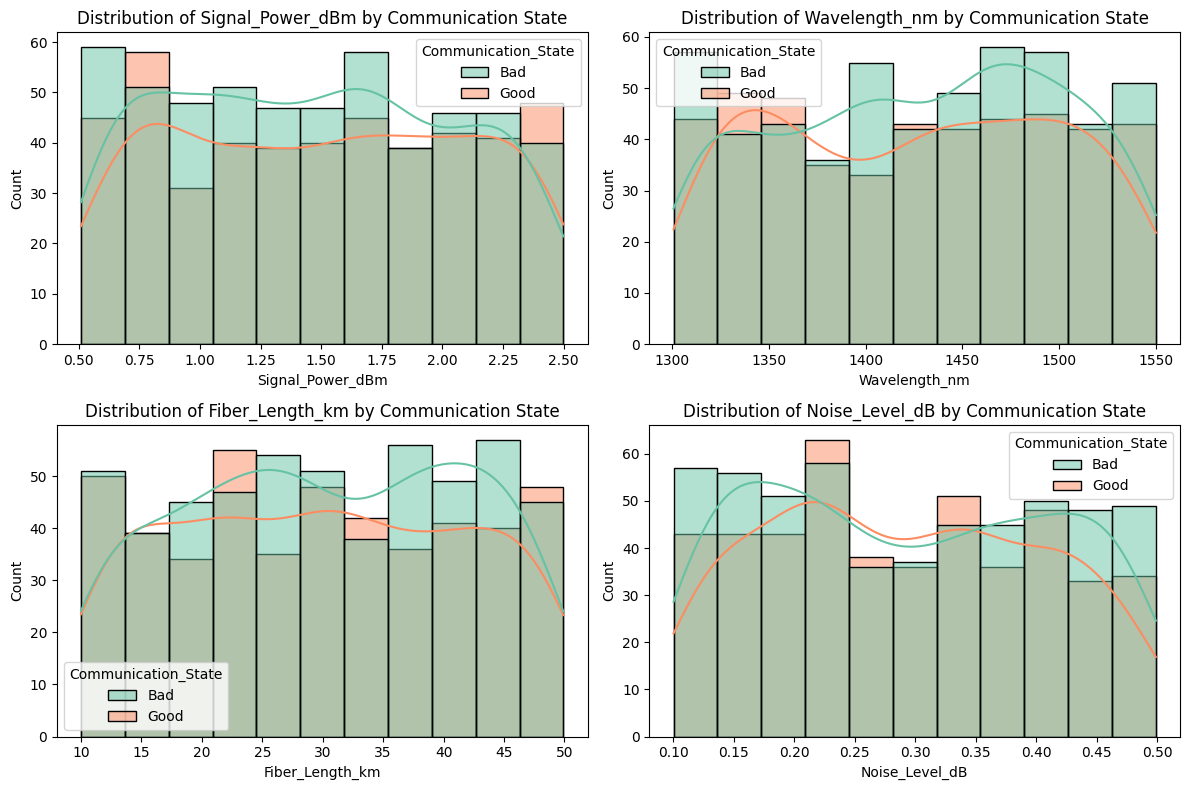

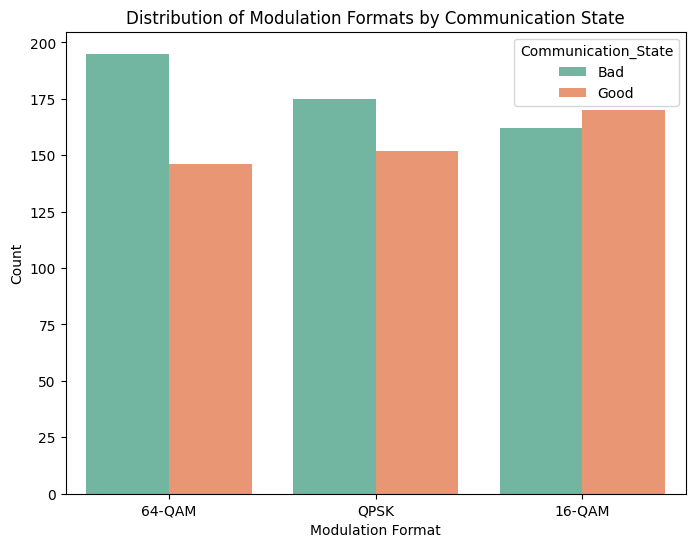

ValueError: A given column is not a column of the dataframe

In [ ]:
# 1. Feature Correlation Analysis
correlation_matrix = synthetic_data[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 2. Feature Distribution by Communication State
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=synthetic_data, x=col, hue='Communication_State', kde=True, palette='Set2')
    plt.title(f'Distribution of {col} by Communication State')
plt.tight_layout()
plt.show()

# 3. Modulation Format Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='Modulation_Format', hue='Communication_State', data=synthetic_data, palette='Set2')
plt.title('Distribution of Modulation Formats by Communication State')
plt.xlabel('Modulation Format')
plt.ylabel('Count')
plt.show()

# 4. Model Performance by Feature Importance
# Extract top k important features
k = 3  # number of top features to consider
top_features = importance_df['Feature'].head(k).tolist()

# Train the model using only top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

rf_model_top_features = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_model_top_features.fit(X_train_top, y_train)

# Evaluate the model
y_pred_top = rf_model_top_features.predict(X_test_top)
accuracy_top = accuracy_score(y_test, y_pred_top)
classification_report_str_top = classification_report(y_test, y_pred_top)

print('\nModel Evaluation using Top Features:')
print(f'Accuracy: {accuracy_top:.2f}')
print('Classification Report:\n', classification_report_str_top)

# 5. Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# 6. Model Interpretability (SHAP values)
import shap

# Initialize explainer with the trained model
explainer = shap.Explainer(rf_model.named_steps['classifier'], X_train)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=all_feature_names)

# 7. Model Comparison (Logistic Regression)
from sklearn.linear_model import LogisticRegression

# Build pipeline for logistic regression
logreg_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

# Train logistic regression model
logreg_model.fit(X_train, y_train)

# Evaluate logistic regression model
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
classification_report_logreg = classification_report(y_test, y_pred_logreg)

print('\nLogistic Regression Model Evaluation:')
print(f'Accuracy: {accuracy_logreg:.2f}')
print('Classification Report:\n', classification_report_logreg)


Synthetic Optical Communication Data:
   Signal_Power_dBm  Wavelength_nm  Fiber_Length_km Modulation_Format  \
0          1.249080    1346.283232        20.468227            64-QAM   
1          2.401429    1435.475237        19.879152              QPSK   
2          1.963988    1518.236459        46.250183              QPSK   
3          1.697317    1483.056222        19.981848            64-QAM   
4          0.812037    1501.640287        20.877989            16-QAM   

   Noise_Level_dB Communication_State  
0        0.350529                 Bad  
1        0.211388                Good  
2        0.441193                 Bad  
3        0.471353                 Bad  
4        0.498559                Good  

Model Evaluation:
Accuracy: 0.47
Classification Report:
               precision    recall  f1-score   support

         Bad       0.51      0.51      0.51       107
        Good       0.43      0.43      0.43        93

    accuracy                           0.48       200
   macr

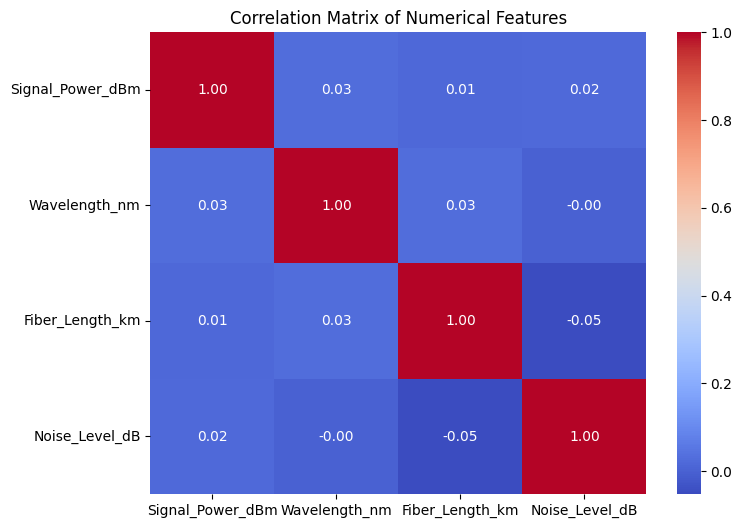

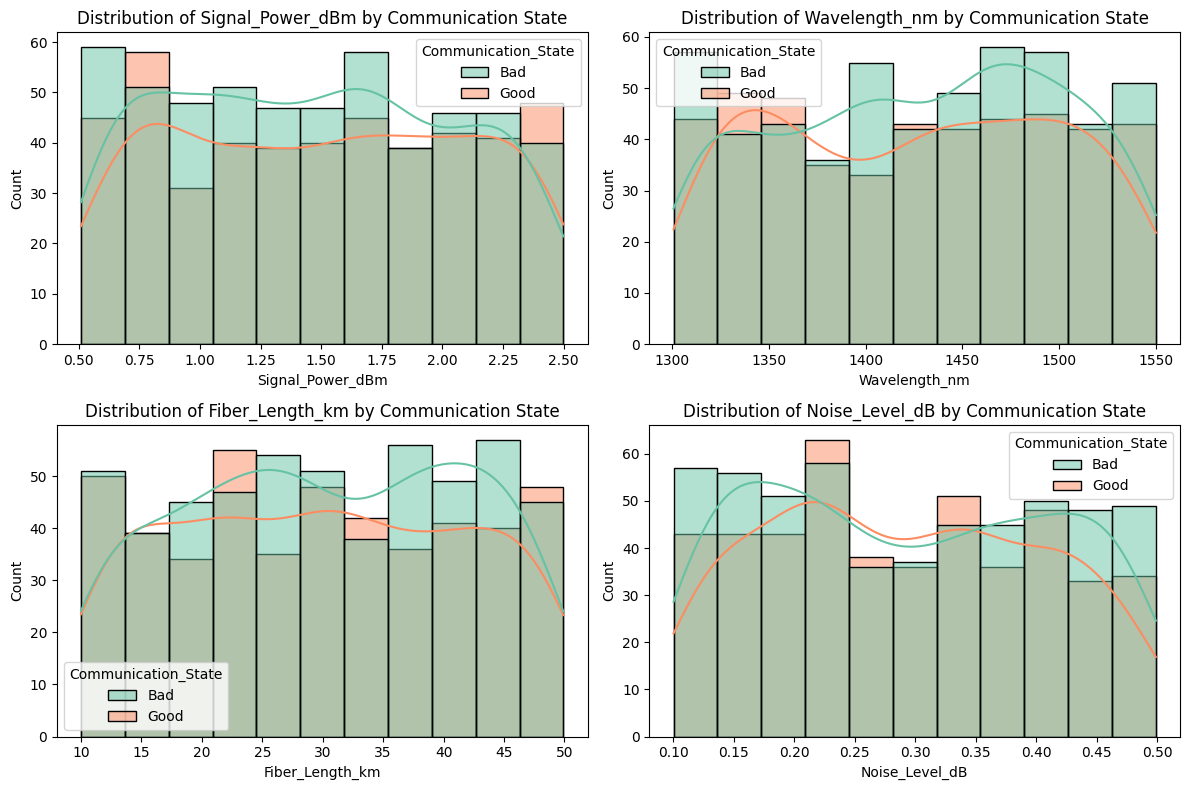

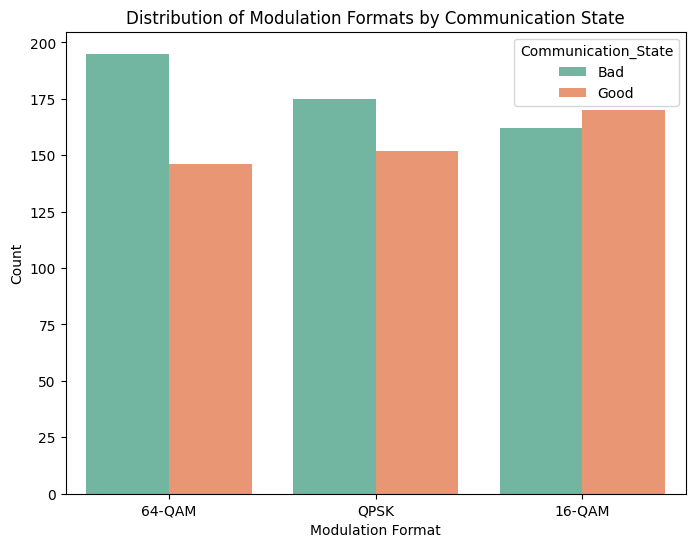

ValueError: A given column is not a column of the dataframe

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic data for optical communication
num_samples = 1000
signal_power = np.random.uniform(0.5, 2.5, num_samples)
wavelength = np.random.uniform(1300, 1550, num_samples)
fiber_length = np.random.uniform(10, 50, num_samples)
modulation_format = np.random.choice(['QPSK', '16-QAM', '64-QAM'], num_samples)
noise_level = np.random.uniform(0.1, 0.5, num_samples)
communication_state = np.random.choice(['Good', 'Bad'], num_samples)

# Create a synthetic dataset
synthetic_data = pd.DataFrame({
    'Signal_Power_dBm': signal_power,
    'Wavelength_nm': wavelength,
    'Fiber_Length_km': fiber_length,
    'Modulation_Format': modulation_format,
    'Noise_Level_dB': noise_level,
    'Communication_State': communication_state
})

# Display the synthetic dataset
print("Synthetic Optical Communication Data:")
print(synthetic_data.head())

# Data preprocessing
X = synthetic_data.drop(['Communication_State'], axis=1)
y = synthetic_data['Communication_State']

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = Pipeline(steps=[('num', 'passthrough')])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Build a RandomForestClassifier
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print('\nModel Evaluation:')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_str)

# Save the synthetic dataset to a CSV file
synthetic_data.to_csv('synthetic_optical_communication_data.csv', index=False)

# 1. Feature Correlation Analysis
correlation_matrix = synthetic_data[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 2. Feature Distribution by Communication State
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=synthetic_data, x=col, hue='Communication_State', kde=True, palette='Set2')
    plt.title(f'Distribution of {col} by Communication State')
plt.tight_layout()
plt.show()

# 3. Modulation Format Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='Modulation_Format', hue='Communication_State', data=synthetic_data, palette='Set2')
plt.title('Distribution of Modulation Formats by Communication State')
plt.xlabel('Modulation Format')
plt.ylabel('Count')
plt.show()

# 4. Model Performance by Feature Importance
# Extract top k important features
k = 3  # number of top features to consider
# top_features = importance_df['Feature'].head(k).tolist()

# Explicitly include necessary features, even if not in top k
top_features = ['Signal_Power_dBm', 'Wavelength_nm', 'Fiber_Length_km']

# Train the model using only top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

rf_model_top_features = Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

rf_model_top_features.fit(X_train_top, y_train)


# Evaluate the model
y_pred_top = rf_model_top_features.predict(X_test_top)
accuracy_top = accuracy_score(y_test, y_pred_top)
classification_report_str_top = classification_report(y_test, y_pred_top)

print('\nModel Evaluation using Top Features:')
print(f'Accuracy: {accuracy_top:.2f}')
print('Classification Report:\n', classification_report_str_top)

# 5. Hyperparameter Tuning
# Define hyperparameters grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# 6. Model Interpretability (SHAP values)
# Initialize explainer with the trained model
explainer = shap.Explainer(rf_model_top_features.named_steps['classifier'], X_train_top)
shap_values = explainer.shap_values(X_test_top)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test_top, feature_names=top_features)

# 7. Model Comparison (Logistic Regression)
from sklearn.linear_model import LogisticRegression

# Build pipeline for logistic regression
logreg_model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression(max_iter=1000, random_state=42))])

# Train logistic regression model
logreg_model.fit(X_train, y_train)

# Evaluate logistic regression model
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
classification_report_logreg = classification_report(y_test, y_pred_logreg)

print('\nLogistic Regression Model Evaluation:')
print(f'Accuracy: {accuracy_logreg:.2f}')
print('Classification Report:\n', classification_report_logreg)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.1 MB/s eta 0:00:00
Synthetic Optical Communication Data:
   Signal_Power_dBm  Wavelength_nm  Fiber_Length_km Modulation_Format  \
0          1.249080    1346.283232        20.468227            64-QAM   
1          2.401429    1435.475237        19.879152              QPSK   
2          1.963988    1518.236459        46.250183              QPSK   
3          1.697317    1483.056222        19.981848            64-QAM   
4          0.812037    1501.640287        20.877989            16-QAM   

   Noise_Level_dB Communication_State  
0        0.350529                 Bad  
1        0.211388                Good  
2        0.441193                 Bad  
3        0.471353                 Bad  
4        0.498559                Good  

Model Evaluation:
Accuracy: 0.47
Classification Report:
               precision    recall  f1-score   support

         Bad       0.51      0.51      0.51       107
        Good       0.43      0.43 

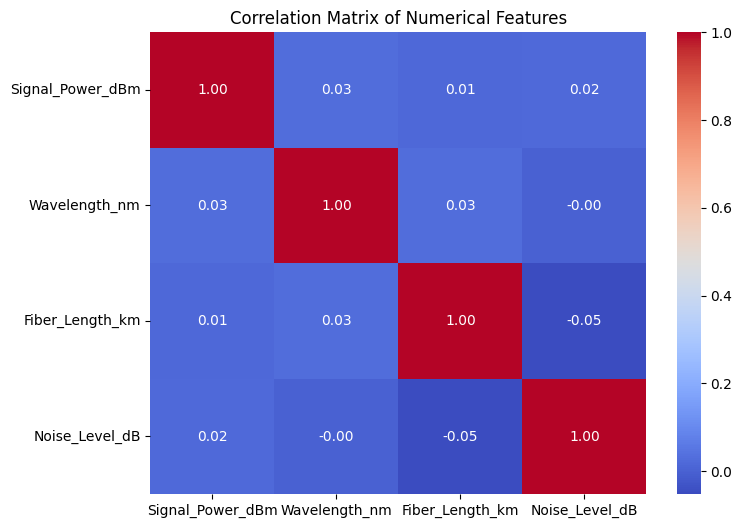

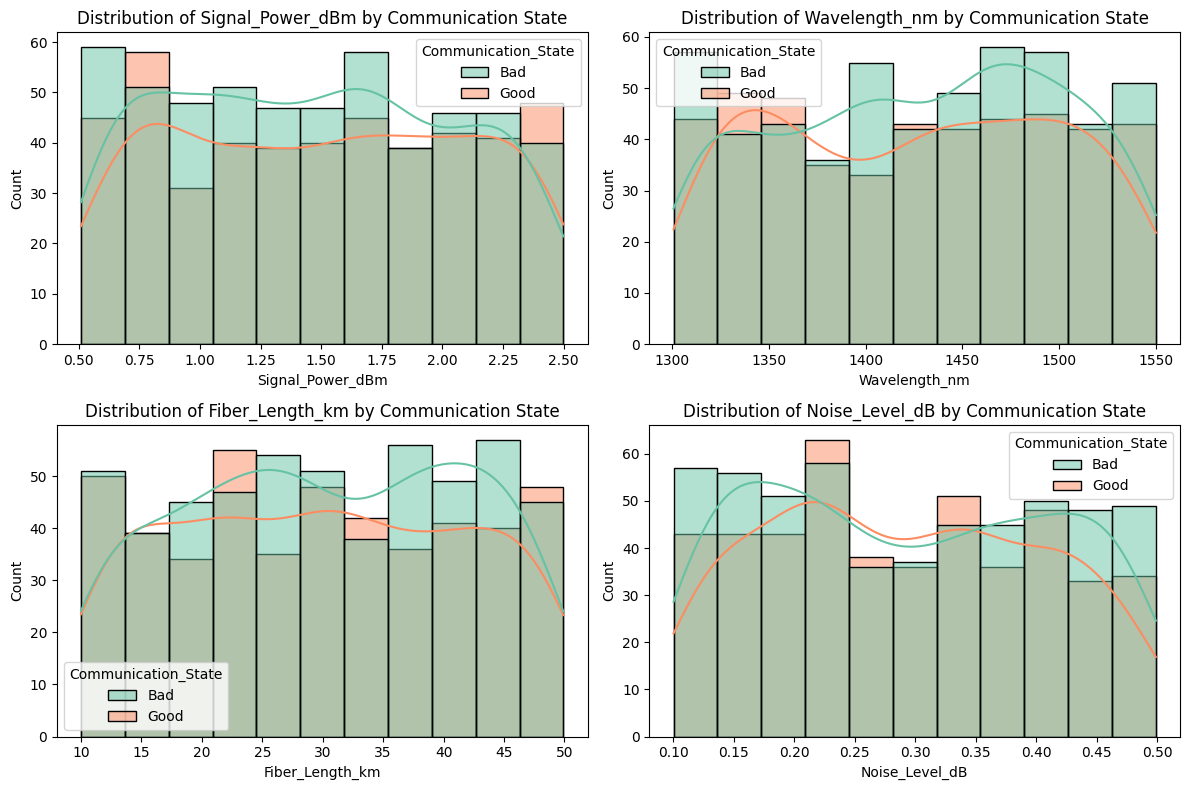

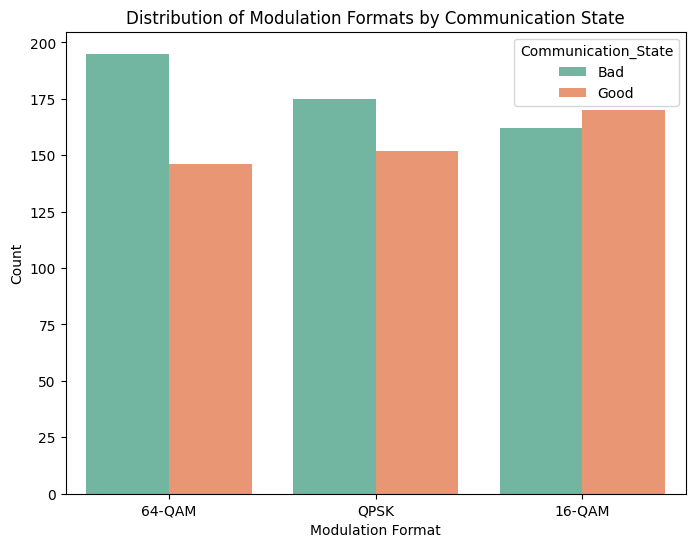

Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best Score: 0.5625


In [ ]:
!pip install shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic data for optical communication
num_samples = 1000
signal_power = np.random.uniform(0.5, 2.5, num_samples)
wavelength = np.random.uniform(1300, 1550, num_samples)
fiber_length = np.random.uniform(10, 50, num_samples)
modulation_format = np.random.choice(['QPSK', '16-QAM', '64-QAM'], num_samples)
noise_level = np.random.uniform(0.1, 0.5, num_samples)
communication_state = np.random.choice(['Good', 'Bad'], num_samples)

# Create a synthetic dataset
synthetic_data = pd.DataFrame({
    'Signal_Power_dBm': signal_power,
    'Wavelength_nm': wavelength,
    'Fiber_Length_km': fiber_length,
    'Modulation_Format': modulation_format,
    'Noise_Level_dB': noise_level,
    'Communication_State': communication_state
})

# Display the synthetic dataset
print("Synthetic Optical Communication Data:")
print(synthetic_data.head())

# Data preprocessing
X = synthetic_data.drop(['Communication_State'], axis=1)
y = synthetic_data['Communication_State']

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = Pipeline(steps=[('num', 'passthrough')])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Build a RandomForestClassifier
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print('\nModel Evaluation:')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_str)

# Save the synthetic dataset to a CSV file
synthetic_data.to_csv('synthetic_optical_communication_data.csv', index=False)

# 1. Feature Correlation Analysis
correlation_matrix = synthetic_data[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 2. Feature Distribution by Communication State
numerical_cols_to_plot = numerical_cols.tolist()  # Convert Index to list
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=synthetic_data, x=col, hue='Communication_State', kde=True, palette='Set2')
    plt.title(f'Distribution of {col} by Communication State')
plt.tight_layout()
plt.show()

# 3. Modulation Format Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='Modulation_Format', hue='Communication_State', data=synthetic_data, palette='Set2')
plt.title('Distribution of Modulation Formats by Communication State')
plt.xlabel('Modulation Format')
plt.ylabel('Count')
plt.show()


# 5. Hyperparameter Tuning
# Define hyperparameters grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# 6. Model Interpretability (SHAP values)
# Initialize explainer with the trained model
#explainer = shap.Explainer(rf_model.named_steps['classifier'], X_train)
#shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
#shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


# 7. Model Comparison (Logistic Regression)
from sklearn.linear_model import LogisticRegression

# Build pipeline for logistic regression
logreg_model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression(max_iter=1000, random_state=42))])

# Train logistic regression model
logreg_model.fit(X_train, y_train)

# Evaluate logistic regression model
y_pred_logreg = logreg_model.predict(X_test)


Synthetic Optical Communication Data:
   Signal_Power_dBm  Wavelength_nm  Fiber_Length_km Modulation_Format  \
0          1.249080    1346.283232        20.468227            64-QAM   
1          2.401429    1435.475237        19.879152              QPSK   
2          1.963988    1518.236459        46.250183              QPSK   
3          1.697317    1483.056222        19.981848            64-QAM   
4          0.812037    1501.640287        20.877989            16-QAM   

   Noise_Level_dB Communication_State  
0        0.350529                 Bad  
1        0.211388                Good  
2        0.441193                 Bad  
3        0.471353                 Bad  
4        0.498559                Good  

Model Evaluation:
Accuracy: 0.47
Classification Report:
               precision    recall  f1-score   support

         Bad       0.51      0.51      0.51       107
        Good       0.43      0.43      0.43        93

    accuracy                           0.48       200
   macr

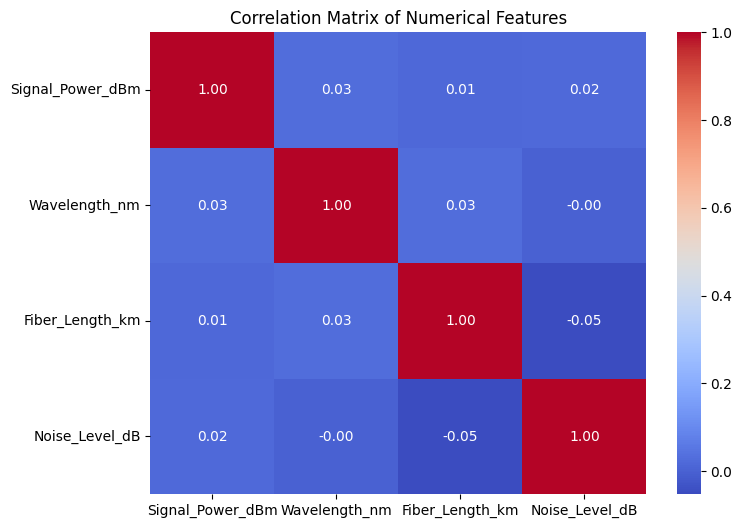

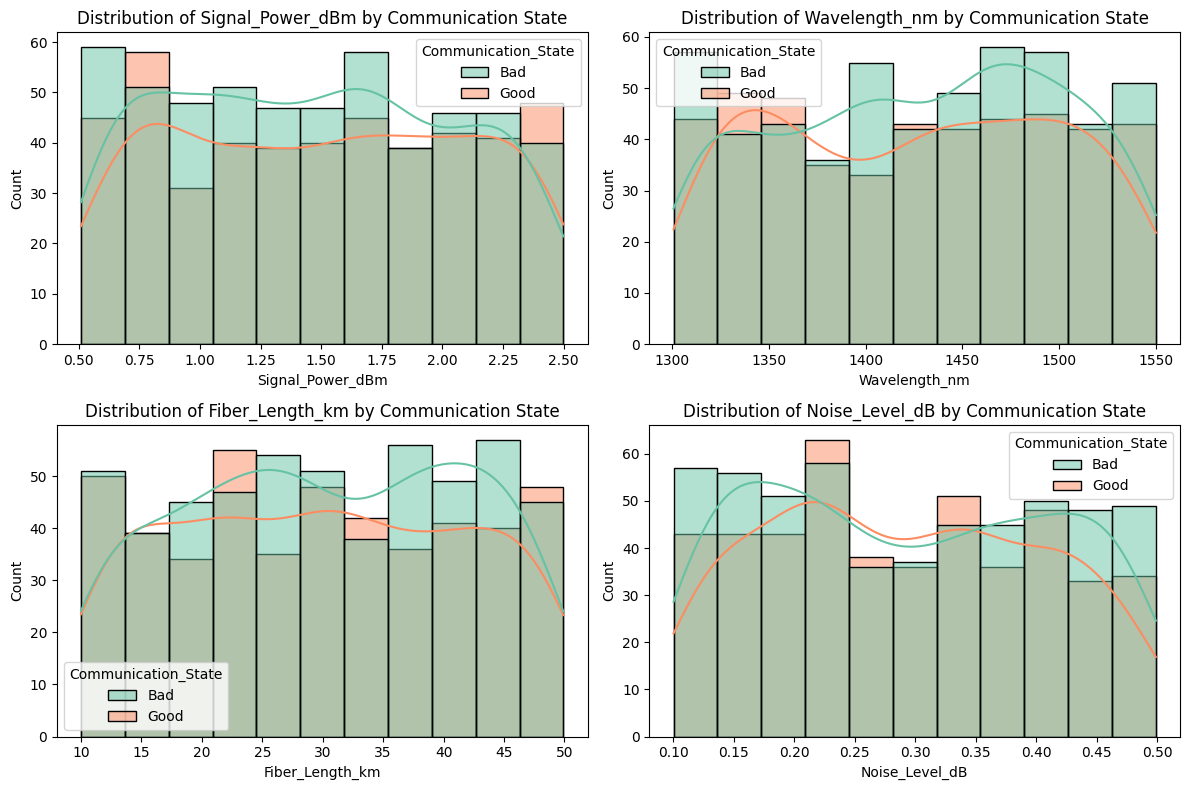

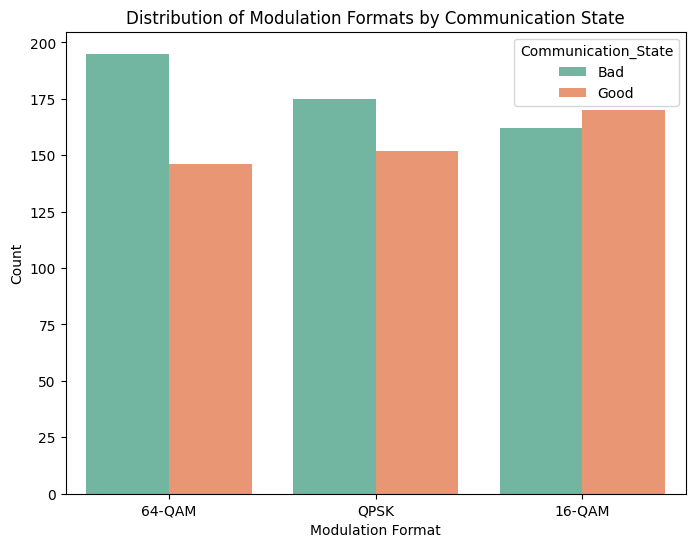

Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best Score: 0.5625

Logistic Regression Model Evaluation:
Accuracy: 0.57
Classification Report:
               precision    recall  f1-score   support

         Bad       0.57      0.80      0.67       107
        Good       0.57      0.30      0.39        93

    accuracy                           0.57       200
   macro avg       0.57      0.55      0.53       200
weighted avg       0.57      0.57      0.54       200



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.linear_model import LogisticRegression

# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic data for optical communication
num_samples = 1000
signal_power = np.random.uniform(0.5, 2.5, num_samples)
wavelength = np.random.uniform(1300, 1550, num_samples)
fiber_length = np.random.uniform(10, 50, num_samples)
modulation_format = np.random.choice(['QPSK', '16-QAM', '64-QAM'], num_samples)
noise_level = np.random.uniform(0.1, 0.5, num_samples)
communication_state = np.random.choice(['Good', 'Bad'], num_samples)

# Create a synthetic dataset
synthetic_data = pd.DataFrame({
    'Signal_Power_dBm': signal_power,
    'Wavelength_nm': wavelength,
    'Fiber_Length_km': fiber_length,
    'Modulation_Format': modulation_format,
    'Noise_Level_dB': noise_level,
    'Communication_State': communication_state
})

# Display the synthetic dataset
print("Synthetic Optical Communication Data:")
print(synthetic_data.head())

# Data preprocessing
X = synthetic_data.drop(['Communication_State'], axis=1)
y = synthetic_data['Communication_State']

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = Pipeline(steps=[('num', 'passthrough')])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Build a RandomForestClassifier
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print('\nModel Evaluation:')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_str)

# Save the synthetic dataset to a CSV file
synthetic_data.to_csv('synthetic_optical_communication_data.csv', index=False)

# 1. Feature Correlation Analysis
correlation_matrix = synthetic_data[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 2. Feature Distribution by Communication State
numerical_cols_to_plot = numerical_cols.tolist()  # Convert Index to list
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=synthetic_data, x=col, hue='Communication_State', kde=True, palette='Set2')
    plt.title(f'Distribution of {col} by Communication State')
plt.tight_layout()
plt.show()

# 3. Modulation Format Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='Modulation_Format', hue='Communication_State', data=synthetic_data, palette='Set2')
plt.title('Distribution of Modulation Formats by Communication State')
plt.xlabel('Modulation Format')
plt.ylabel('Count')
plt.show()

# 5. Hyperparameter Tuning
# Define hyperparameters grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# 6. Model Comparison (Logistic Regression)
# Build pipeline for logistic regression
logreg_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

# Train logistic regression model
logreg_model.fit(X_train, y_train)

# Evaluate logistic regression model
y_pred_logreg = logreg_model.predict(X_test)

# Print logistic regression results
print('\nLogistic Regression Model Evaluation:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_logreg):.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_logreg))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.linear_model import LogisticRegression

# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic data for optical communication
num_samples = 1000
signal_power = np.random.uniform(0.5, 2.5, num_samples)
wavelength = np.random.uniform(1300, 1550, num_samples)
fiber_length = np.random.uniform(10, 50, num_samples)
modulation_format = np.random.choice(['QPSK', '16-QAM', '64-QAM'], num_samples)
noise_level = np.random.uniform(0.1, 0.5, num_samples)
communication_state = np.random.choice(['Good', 'Bad'], num_samples)

# Create a synthetic dataset
synthetic_data = pd.DataFrame({
    'Signal_Power_dBm': signal_power,
    'Wavelength_nm': wavelength,
    'Fiber_Length_km': fiber_length,
    'Modulation_Format': modulation_format,
    'Noise_Level_dB': noise_level,
    'Communication_State': communication_state
})

# Display the synthetic dataset
print("Synthetic Optical Communication Data:")
print(synthetic_data.head())

# Data preprocessing
X = synthetic_data.drop(['Communication_State'], axis=1)
y = synthetic_data['Communication_State']

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = Pipeline(steps=[('num', 'passthrough')])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Build a RandomForestClassifier
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print('\nModel Evaluation:')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_str)

# Save the synthetic dataset to a CSV file
synthetic_data.to_csv('synthetic_optical_communication_data.csv', index=False)


# 1. Feature Correlation Analysis
correlation_matrix = synthetic_data[numerical_cols].corr()
plt.figure(figsize=(12, 10))  # Enlarge the figure size for better resolution
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 16, "fontweight": "bold"})  # Bolden the annotation text
plt.title('Correlation Matrix of Numerical Features', fontweight='bold', fontsize=16)  # Bolden the title
plt.show()
print(correlation_matrix)

# 2. Feature Distribution by Communication State
numerical_cols_to_plot = numerical_cols.tolist()  # Convert Index to list
plt.figure(figsize=(16, 12))  # Enlarge the figure size for better resolution
for i, col in enumerate(numerical_cols_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=synthetic_data, x=col, hue='Communication_State', kde=True, palette='Set2')
    plt.title(f'Distribution of {col} by Communication State', fontweight='bold', fontsize=16)  # Bolden the title
plt.tight_layout()
plt.show()
## Print all histogram results
# Analyze numerical column values by Communication State
print("Analysis of numerical column values by Communication State:")
for col in numerical_cols_to_plot:
    print(f"\nStatistics for {col}:")
    for state in synthetic_data['Communication_State'].unique():
        state_data = synthetic_data[synthetic_data['Communication_State'] == state][col]
        print(f"Communication State: {state}")
        print(f"Mean {col}: {state_data.mean()}")
        print(f"Median {col}: {state_data.median()}")
        print(f"Min {col}: {state_data.min()}")
        print(f"Max {col}: {state_data.max()}")


# 3. Modulation Format Analysis
plt.figure(figsize=(12, 10))  # Enlarge the figure size for better resolution
sns.countplot(x='Modulation_Format', hue='Communication_State', data=synthetic_data, palette='Set2')
plt.title('Distribution of Modulation Formats by Communication State', fontweight='bold', fontsize=16)  # Bolden the title
plt.xlabel('Modulation Format', fontweight='bold', fontsize=16)  # Bolden the x-axis label
plt.ylabel('Count', fontweight='bold', fontsize=16)  # Bolden the y-axis label
plt.show()

# 5. Hyperparameter Tuning
# Define hyperparameters grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# 6. Model Comparison (Logistic Regression)
# Build pipeline for logistic regression
logreg_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

# Train logistic regression model
logreg_model.fit(X_train, y_train)

# Evaluate logistic regression model
y_pred_logreg = logreg_model.predict(X_test)

# Print logistic regression results
print('\nLogistic Regression Model Evaluation:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_logreg):.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_logreg))


ModuleNotFoundError: No module named 'shap'

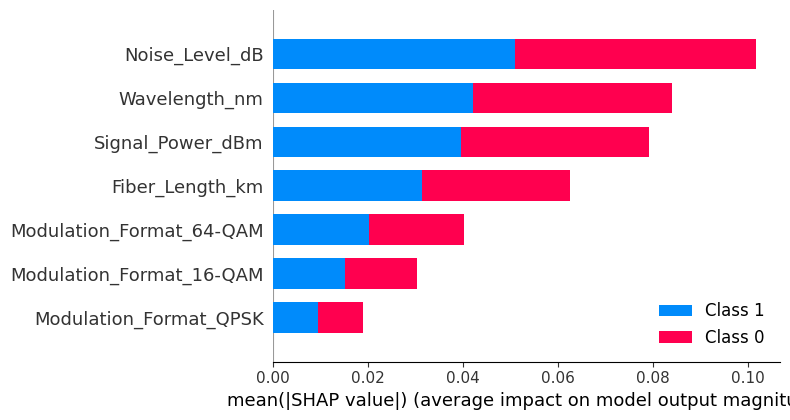

In [ ]:
# 6. Model Interpretability (SHAP values)
# Data preprocessing
X = synthetic_data.drop(['Communication_State'], axis=1)
y = synthetic_data['Communication_State']

# Encode categorical variables
X_encoded = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Build a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# 6. Model Interpretability (SHAP values)
# Initialize explainer with the trained model
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type='bar', show=False, max_display=X_test.shape[1])
plt.title('SHAP Values for Model Interpretability', fontsize=17, fontweight='bold')
plt.xlabel('SHAP Value Magnitude', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.tight_layout()
plt.show()

# Print SHAP values
print("SHAP values for each feature:")
print(shap_values)

Synthetic Optical Communication Data:
   Signal_Power_dBm  Wavelength_nm  Fiber_Length_km Modulation_Format  \
0          1.249080    1346.283232        20.468227            64-QAM   
1          2.401429    1435.475237        19.879152              QPSK   
2          1.963988    1518.236459        46.250183              QPSK   
3          1.697317    1483.056222        19.981848            64-QAM   
4          0.812037    1501.640287        20.877989            16-QAM   

   Noise_Level_dB Communication_State  
0        0.350529                 Bad  
1        0.211388                Good  
2        0.441193                 Bad  
3        0.471353                 Bad  
4        0.498559                Good  

Model Evaluation:
Accuracy: 0.47
Classification Report:
               precision    recall  f1-score   support

         Bad       0.51      0.51      0.51       107
        Good       0.43      0.43      0.43        93

    accuracy                           0.48       200
   macr

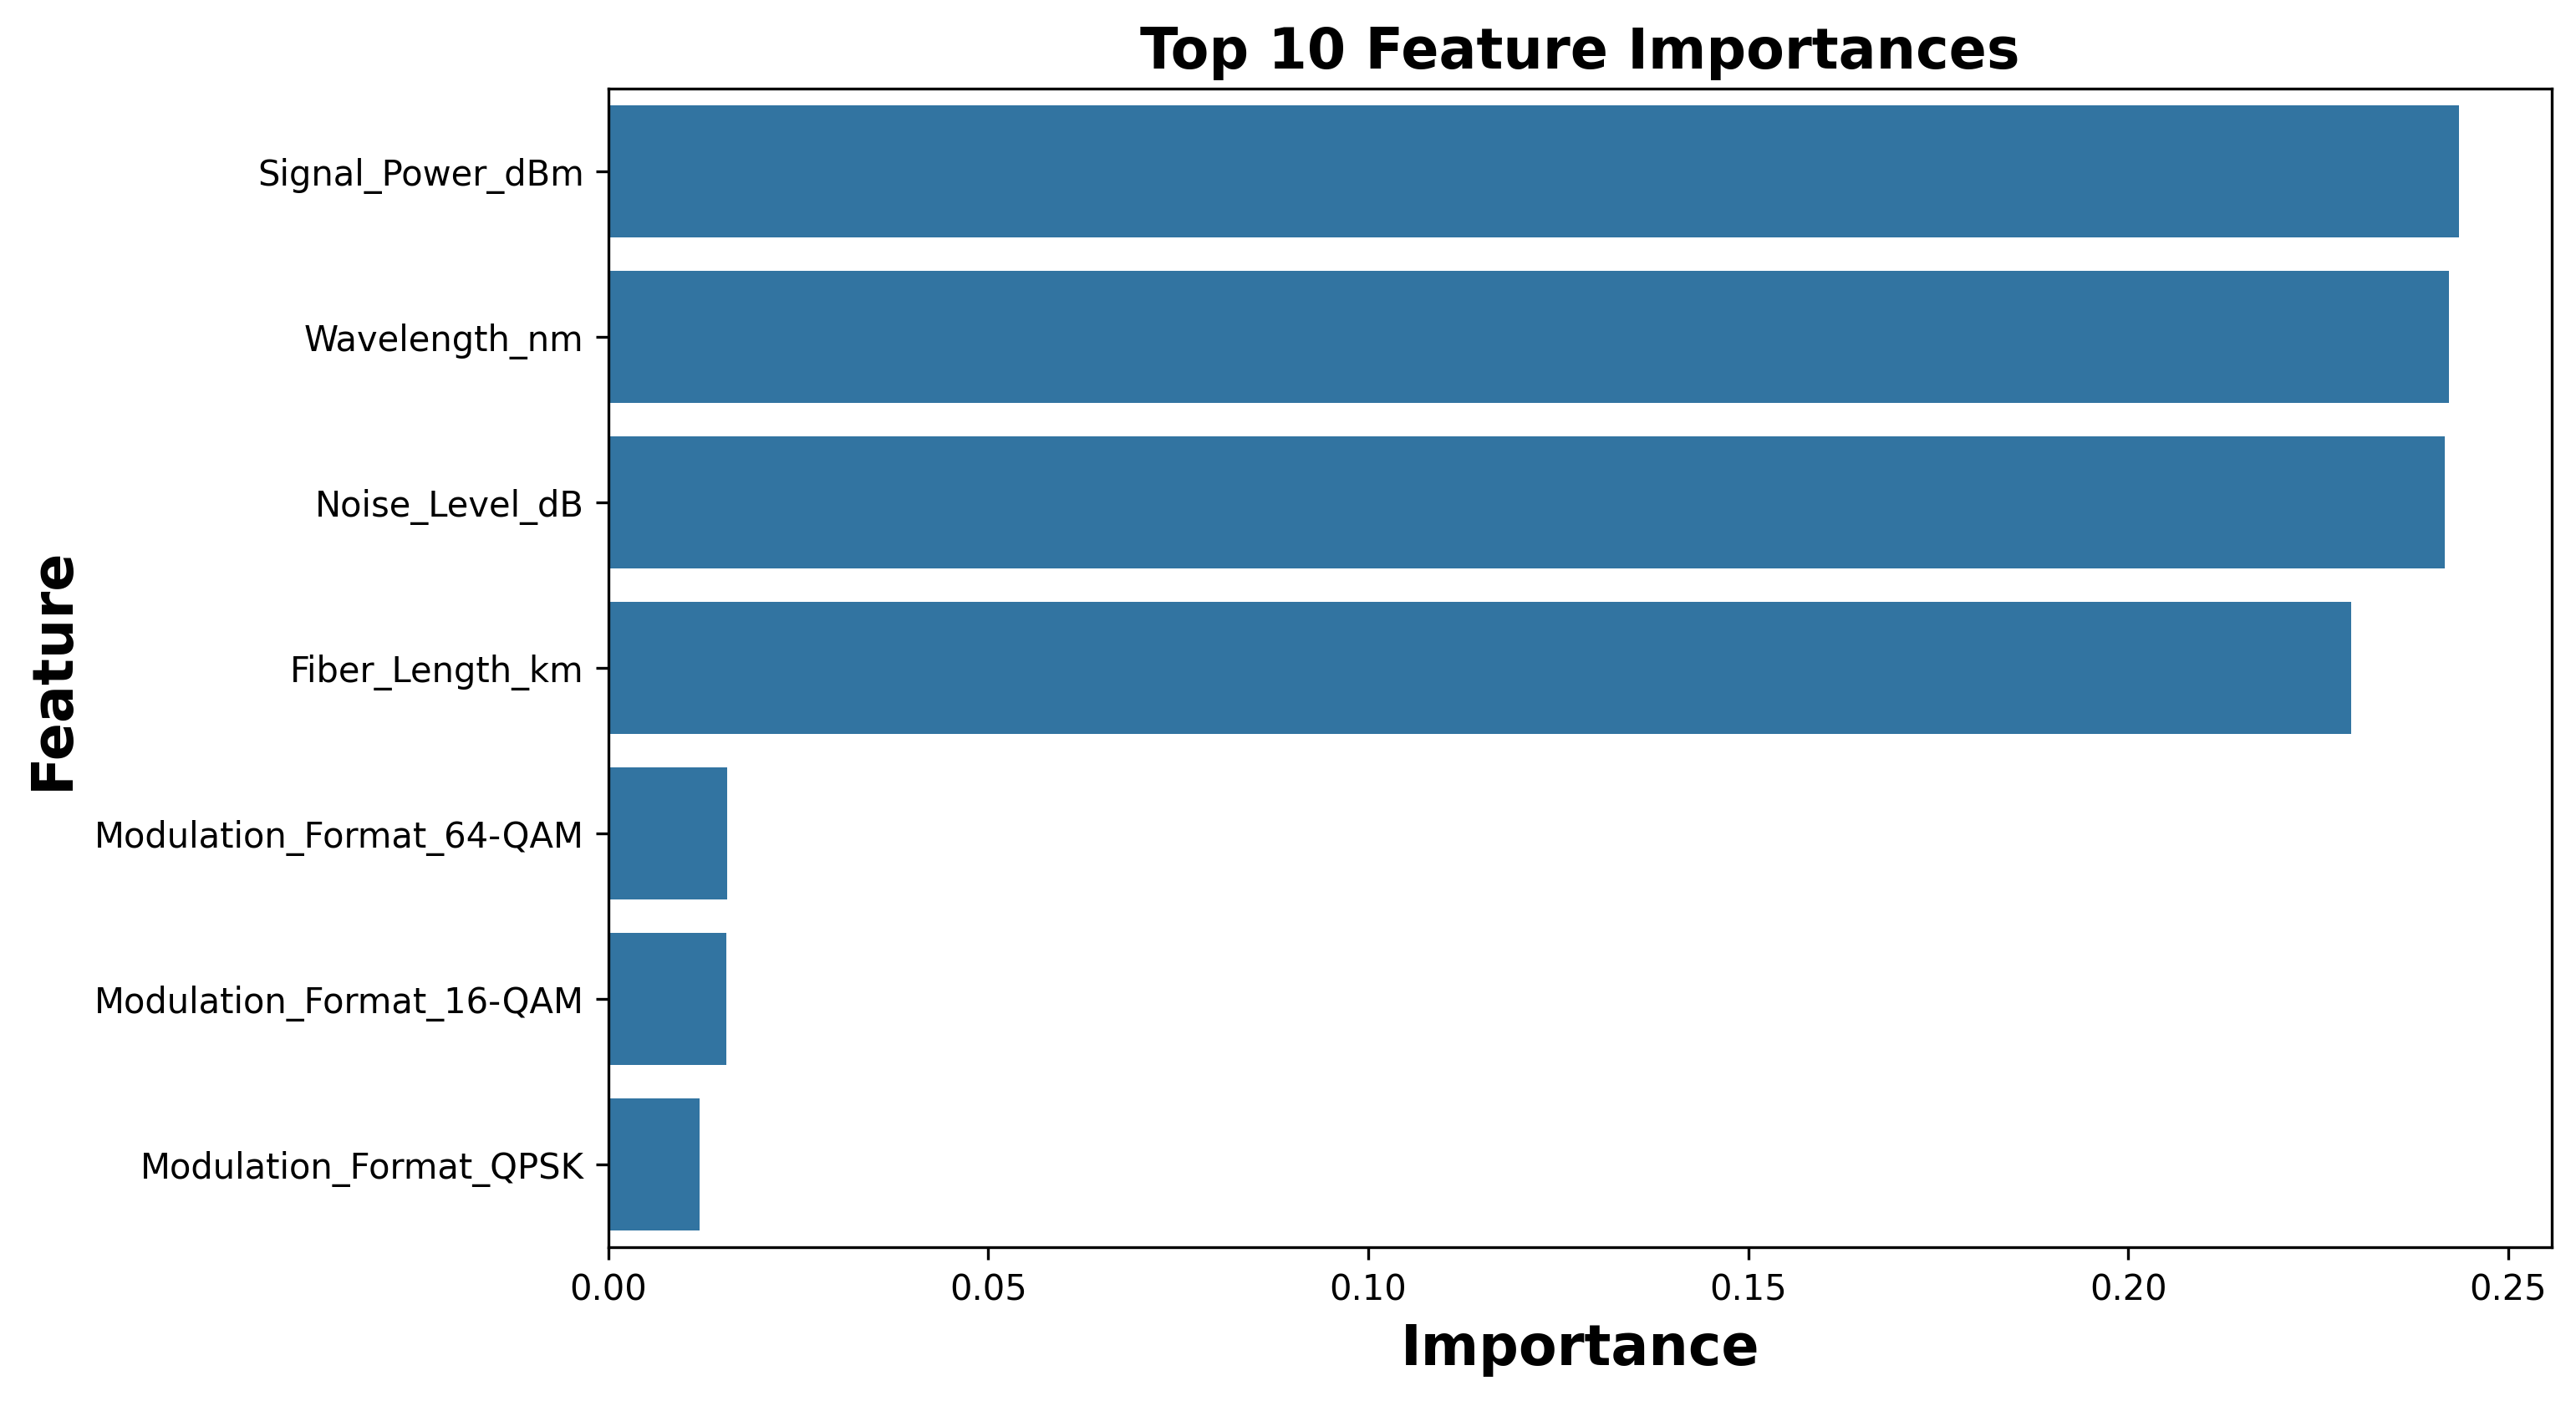

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic data for optical communication
num_samples = 1000
signal_power = np.random.uniform(0.5, 2.5, num_samples)
wavelength = np.random.uniform(1300, 1550, num_samples)
fiber_length = np.random.uniform(10, 50, num_samples)
modulation_format = np.random.choice(['QPSK', '16-QAM', '64-QAM'], num_samples)
noise_level = np.random.uniform(0.1, 0.5, num_samples)
communication_state = np.random.choice(['Good', 'Bad'], num_samples)

# Create a synthetic dataset
synthetic_data = pd.DataFrame({
    'Signal_Power_dBm': signal_power,
    'Wavelength_nm': wavelength,
    'Fiber_Length_km': fiber_length,
    'Modulation_Format': modulation_format,
    'Noise_Level_dB': noise_level,
    'Communication_State': communication_state
})

# Display the synthetic dataset
print("Synthetic Optical Communication Data:")
print(synthetic_data.head())

# Data preprocessing
X = synthetic_data.drop(['Communication_State'], axis=1)
y = synthetic_data['Communication_State']

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = Pipeline(steps=[('num', 'passthrough')])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Build a RandomForestClassifier
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print('\nModel Evaluation:')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_str)

# Extract feature importances
feature_importances = rf_model.named_steps['classifier'].feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': numerical_cols.tolist() + \
               rf_model.named_steps['preprocessor'].named_transformers_['cat'] \
               .named_steps['onehot'].get_feature_names_out(categorical_cols).tolist(),
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6), dpi=300)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances',fontweight='bold', fontsize=16)
plt.title('Top 10 Feature Importances',fontweight='bold', fontsize=16)
plt.xlabel('Importance', fontweight='bold', fontsize=16)
plt.ylabel('Feature', fontweight='bold', fontsize=16)
plt.show()

# Save the synthetic dataset to a CSV file
synthetic_data.to_csv('synthetic_optical_communication_data.csv', index=False)
plt.savefig('feature_importances_plot.png')
print("Top 10 Feature Importances:")
print(feature_importance_df.head(10))

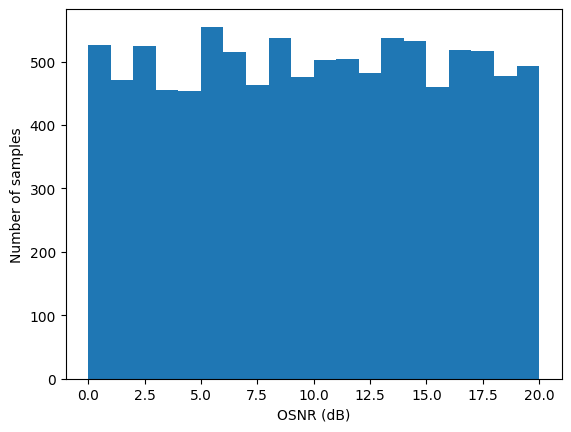

In [ ]:
import numpy as np

# Generate synthetic data
num_samples = 10000
snr_values = np.random.uniform(0, 20, num_samples)
noise_power = 10 ** (-snr_values / 10)

# Define a function to calculate the OSNR
def calculate_osnr(signal_power, noise_power):
    return 10 * np.log10(signal_power / noise_power)

# Initialize variables
signal_power = 1
osnr_values = np.zeros_like(snr_values)

# Calculate the OSNR for each sample
for i in range(num_samples):
    osnr_values[i] = calculate_osnr(signal_power, noise_power[i])

# Plot the OSNR values
import matplotlib.pyplot as plt
plt.hist(osnr_values, bins=20)
plt.xlabel("OSNR (dB)")
plt.ylabel("Number of samples")
plt.show()


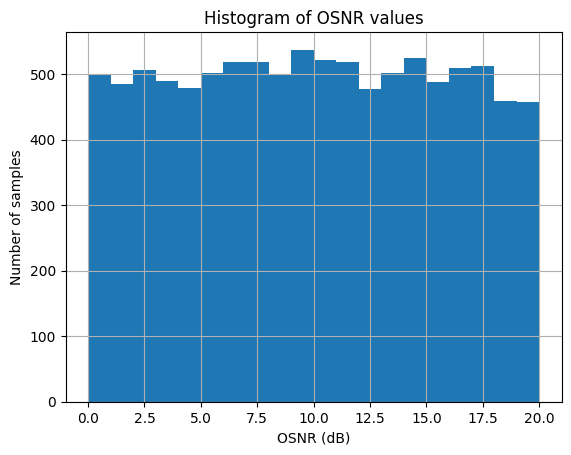

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
num_samples = 10000
# Generate random SNR values
snr_values = np.random.uniform(0, 20, num_samples)
# Calculate noise power based on SNR values
noise_power = 10 ** (-snr_values / 10)

# Define a function to calculate the OSNR
def calculate_osnr(signal_power, noise_power):
    return 10 * np.log10(signal_power / noise_power)

# Initialize variables
signal_power = 1

# Calculate the OSNR for each sample using numpy
osnr_values = calculate_osnr(signal_power, noise_power)

# Plot the OSNR values
plt.hist(osnr_values, bins=20)
plt.xlabel("OSNR (dB)")
plt.ylabel("Number of samples")
plt.title("Histogram of OSNR values")
plt.grid(True)
plt.show()


Synthetic Optical Communication Data:
   Signal_Power_dBm  Wavelength_nm  Fiber_Length_km Modulation_Format  \
0          1.249080    1346.283232        20.468227            64-QAM   
1          2.401429    1435.475237        19.879152              QPSK   
2          1.963988    1518.236459        46.250183              QPSK   
3          1.697317    1483.056222        19.981848            64-QAM   
4          0.812037    1501.640287        20.877989            16-QAM   

   Noise_Level_dB Communication_State  
0        0.350529                 Bad  
1        0.211388                Good  
2        0.441193                 Bad  
3        0.471353                 Bad  
4        0.498559                Good  

Model Evaluation:
Accuracy: 0.47
Classification Report:
               precision    recall  f1-score   support

         Bad       0.51      0.51      0.51       107
        Good       0.43      0.43      0.43        93

    accuracy                           0.48       200
   macr

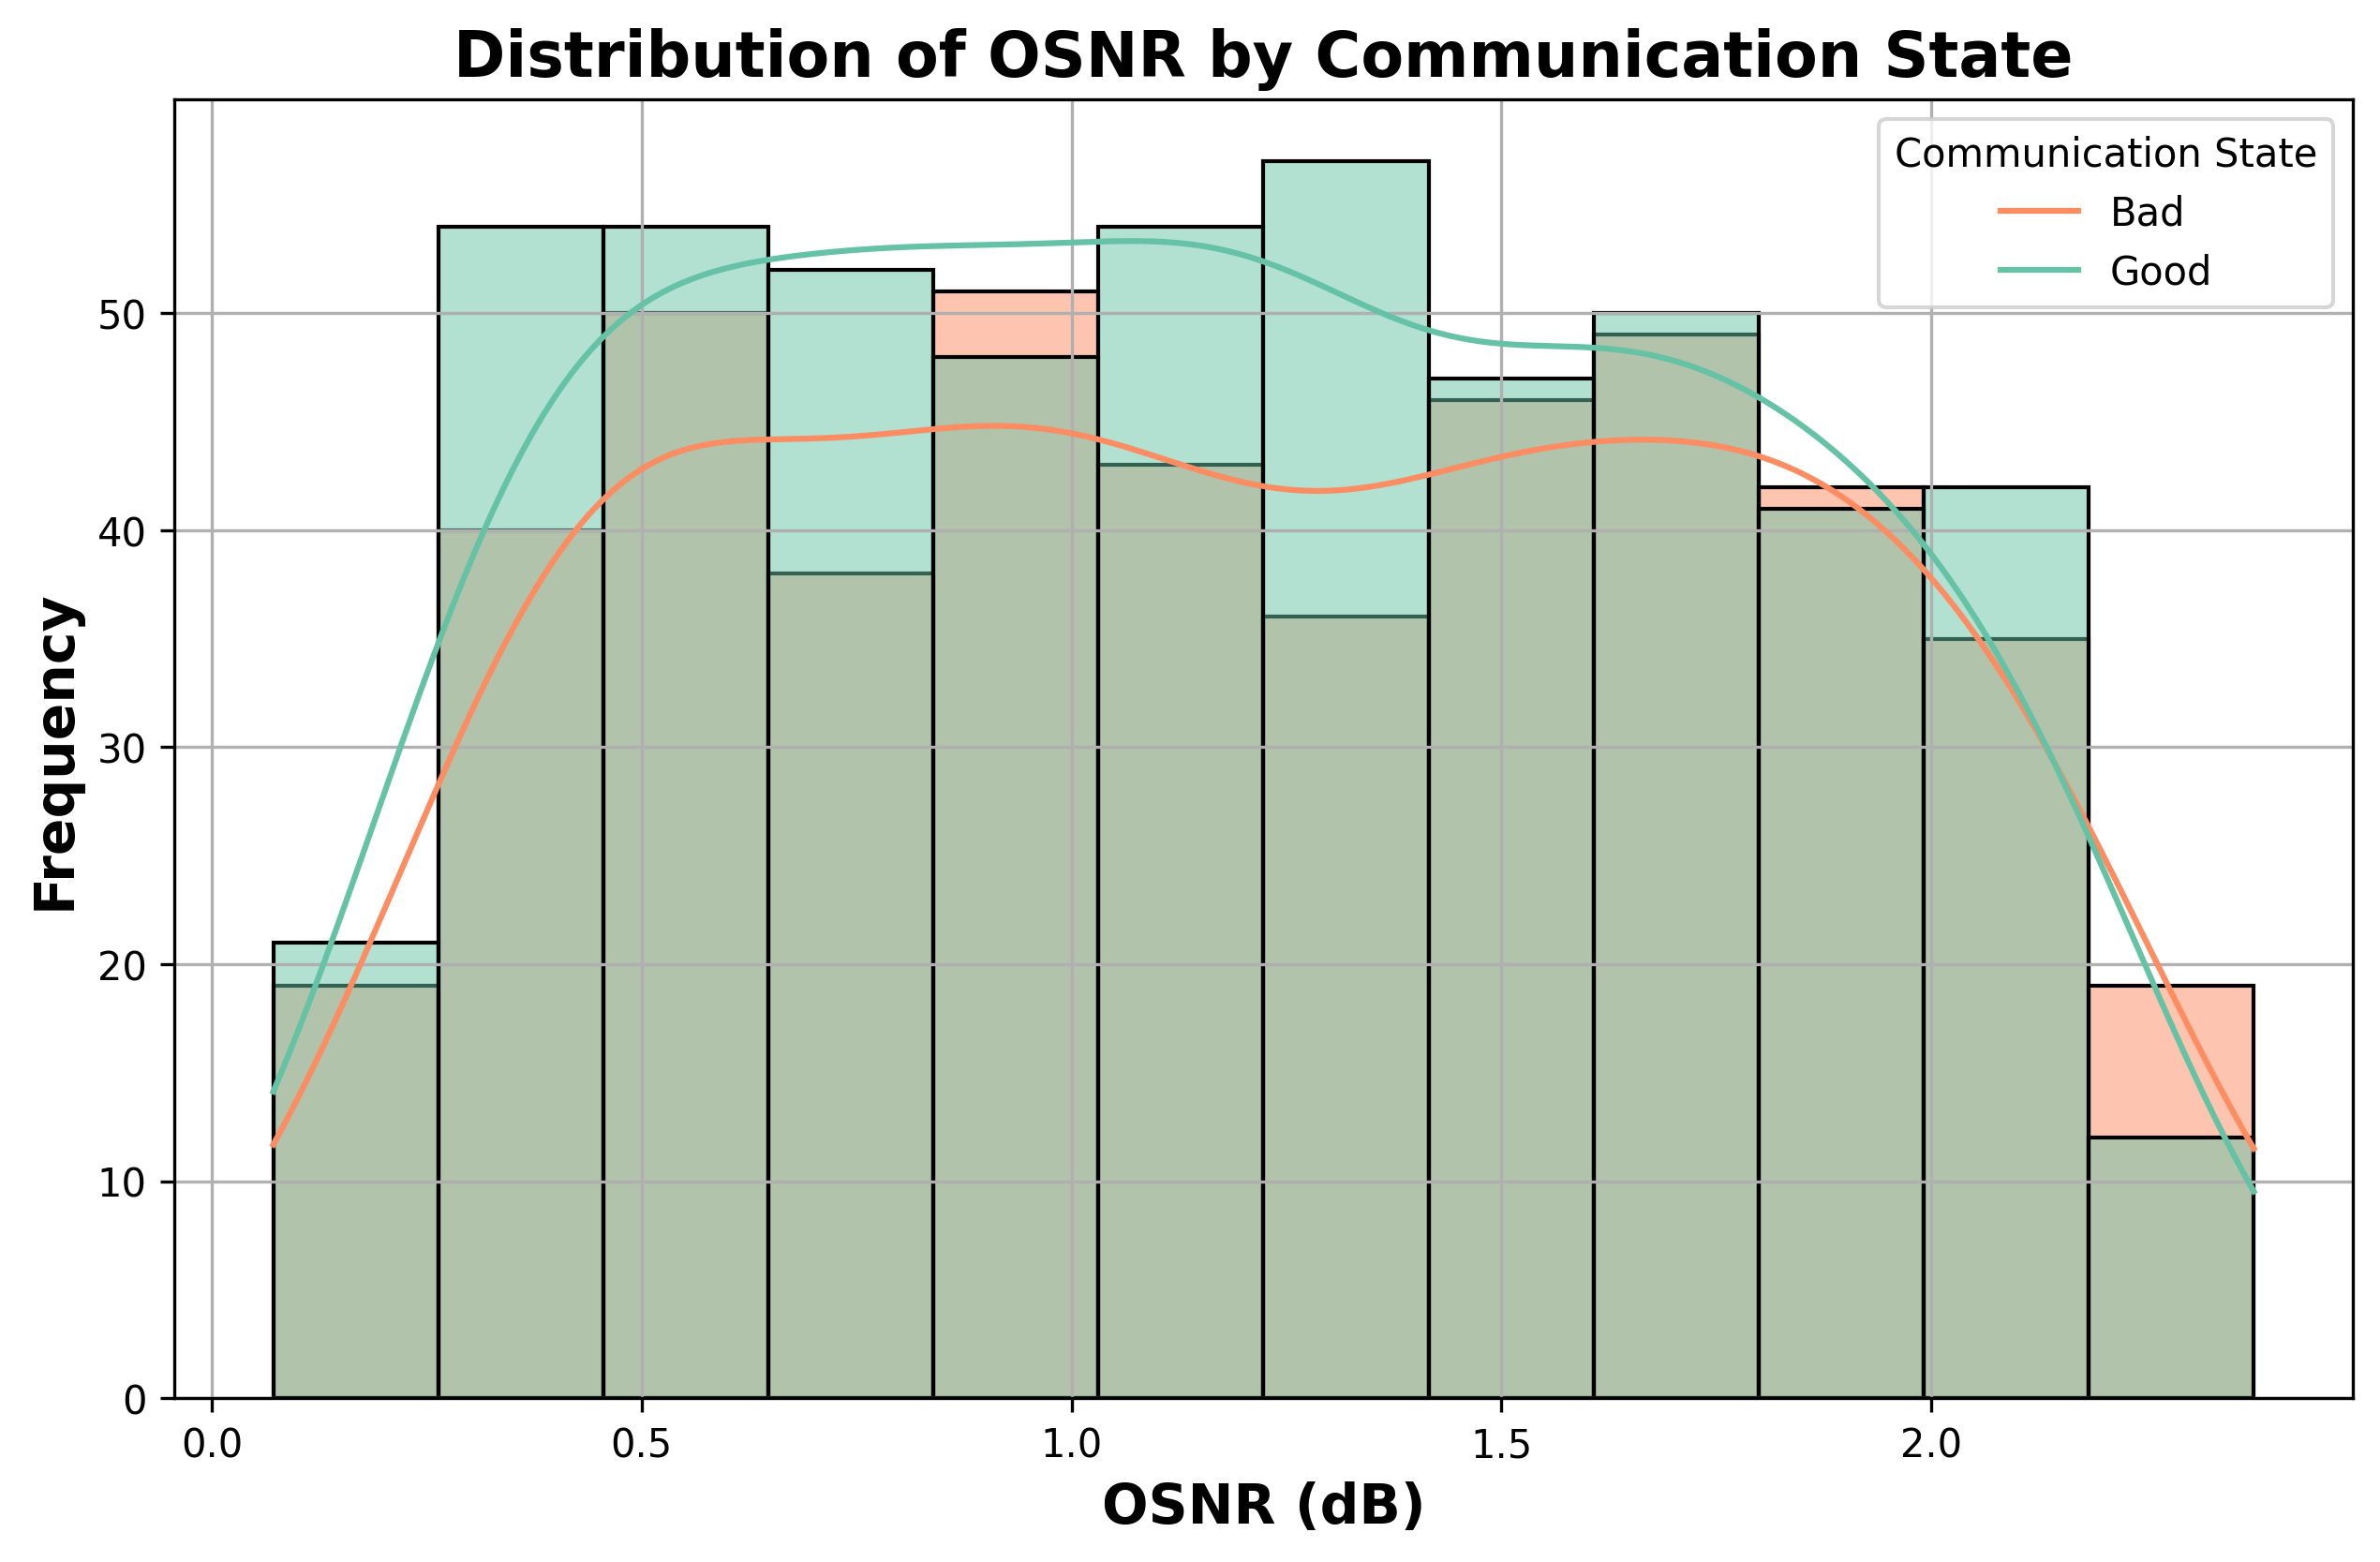

OSNR Values:
0      0.898551
1      2.190040
2      1.522795
3      1.225964
4      0.313478
         ...   
995    0.328745
996    2.073910
997    0.442506
998    2.177325
999    1.101132
Name: OSNR_dB, Length: 1000, dtype: float64


In [ ]:
##Osnr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic data for optical communication
num_samples = 1000

# Features related to optical communication
signal_power = np.random.uniform(0.5, 2.5, num_samples)
wavelength = np.random.uniform(1300, 1550, num_samples)
fiber_length = np.random.uniform(10, 50, num_samples)
modulation_format = np.random.choice(['QPSK', '16-QAM', '64-QAM'], num_samples)
noise_level = np.random.uniform(0.1, 0.5, num_samples)

# Simulate a target variable indicating the communication state (e.g., Good or Bad)
# You can customize this based on your specific classification scenario
communication_state = np.random.choice(['Good', 'Bad'], num_samples)

# Create a synthetic dataset
synthetic_data = pd.DataFrame({
    'Signal_Power_dBm': signal_power,
    'Wavelength_nm': wavelength,
    'Fiber_Length_km': fiber_length,
    'Modulation_Format': modulation_format,
    'Noise_Level_dB': noise_level,
    'Communication_State': communication_state
})

# Display the synthetic dataset
print("Synthetic Optical Communication Data:")
print(synthetic_data.head())

# Data preprocessing
X = synthetic_data.drop(['Communication_State'], axis=1)
y = synthetic_data['Communication_State']

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = Pipeline(steps=[('num', 'passthrough')])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Build a RandomForestClassifier
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print('\nModel Evaluation:')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_str)

# Cross-validate the model (optional)
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print('\nCross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', np.mean(cv_scores))

# Save the synthetic dataset to a CSV file
synthetic_data.to_csv('synthetic_optical_communication_data.csv', index=False)

# Compute OSNR values
synthetic_data['OSNR_dB'] = synthetic_data['Signal_Power_dBm'] - synthetic_data['Noise_Level_dB']

# Analyze OSNR distribution by communication state
plt.figure(figsize=(10, 6), dpi=300)
sns.histplot(data=synthetic_data, x='OSNR_dB', hue='Communication_State', kde=True, palette='Set2')
plt.title('Distribution of OSNR by Communication State', fontweight='bold', fontsize=16)
plt.xlabel('OSNR (dB)', fontweight='bold', fontsize=14)
plt.ylabel('Frequency', fontweight='bold', fontsize=14)


# Specify legend labels
legend_labels = synthetic_data['Communication_State'].unique()
plt.legend(title='Communication State', labels=legend_labels)

plt.grid(True)
plt.show()
# Print OSNR values
print("OSNR Values:")
print(synthetic_data['OSNR_dB'])


<ipython-input-8-8649076f4a35>:14: RuntimeWarning: invalid value encountered in log10
  return 10 * np.log10(signal_power / noise_power)


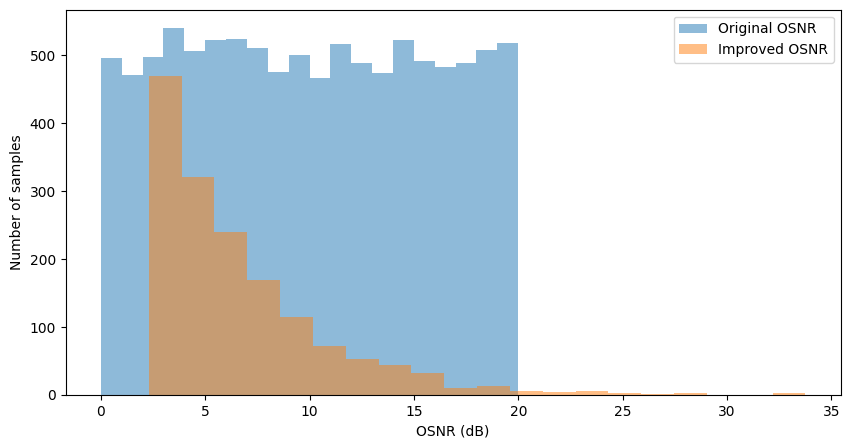

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate synthetic data
num_samples = 10000
signal_power = 1
snr_values = np.random.uniform(0, 20, num_samples)
noise_power = 10 ** (-snr_values / 10)

# Define a function to calculate the OSNR
def calculate_osnr(signal_power, noise_power):
    return 10 * np.log10(signal_power / noise_power)

# Calculate the original OSNR values
original_osnr_values = calculate_osnr(signal_power, noise_power)

# Train-test split
X = original_osnr_values.reshape(-1, 1)
y = noise_power
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict noise power using the trained model
predicted_noise_power = model.predict(X_test)

# Recalculate OSNR with predicted noise power
reduced_osnr_values = calculate_osnr(signal_power, predicted_noise_power)

# Plot the original and improved OSNR values
plt.figure(figsize=(10, 5))
plt.hist(original_osnr_values, bins=20, alpha=0.5, label='Original OSNR')
plt.hist(reduced_osnr_values, bins=20, alpha=0.5, label='Improved OSNR')
plt.xlabel("OSNR (dB)")
plt.ylabel("Number of samples")
plt.legend()
plt.show()


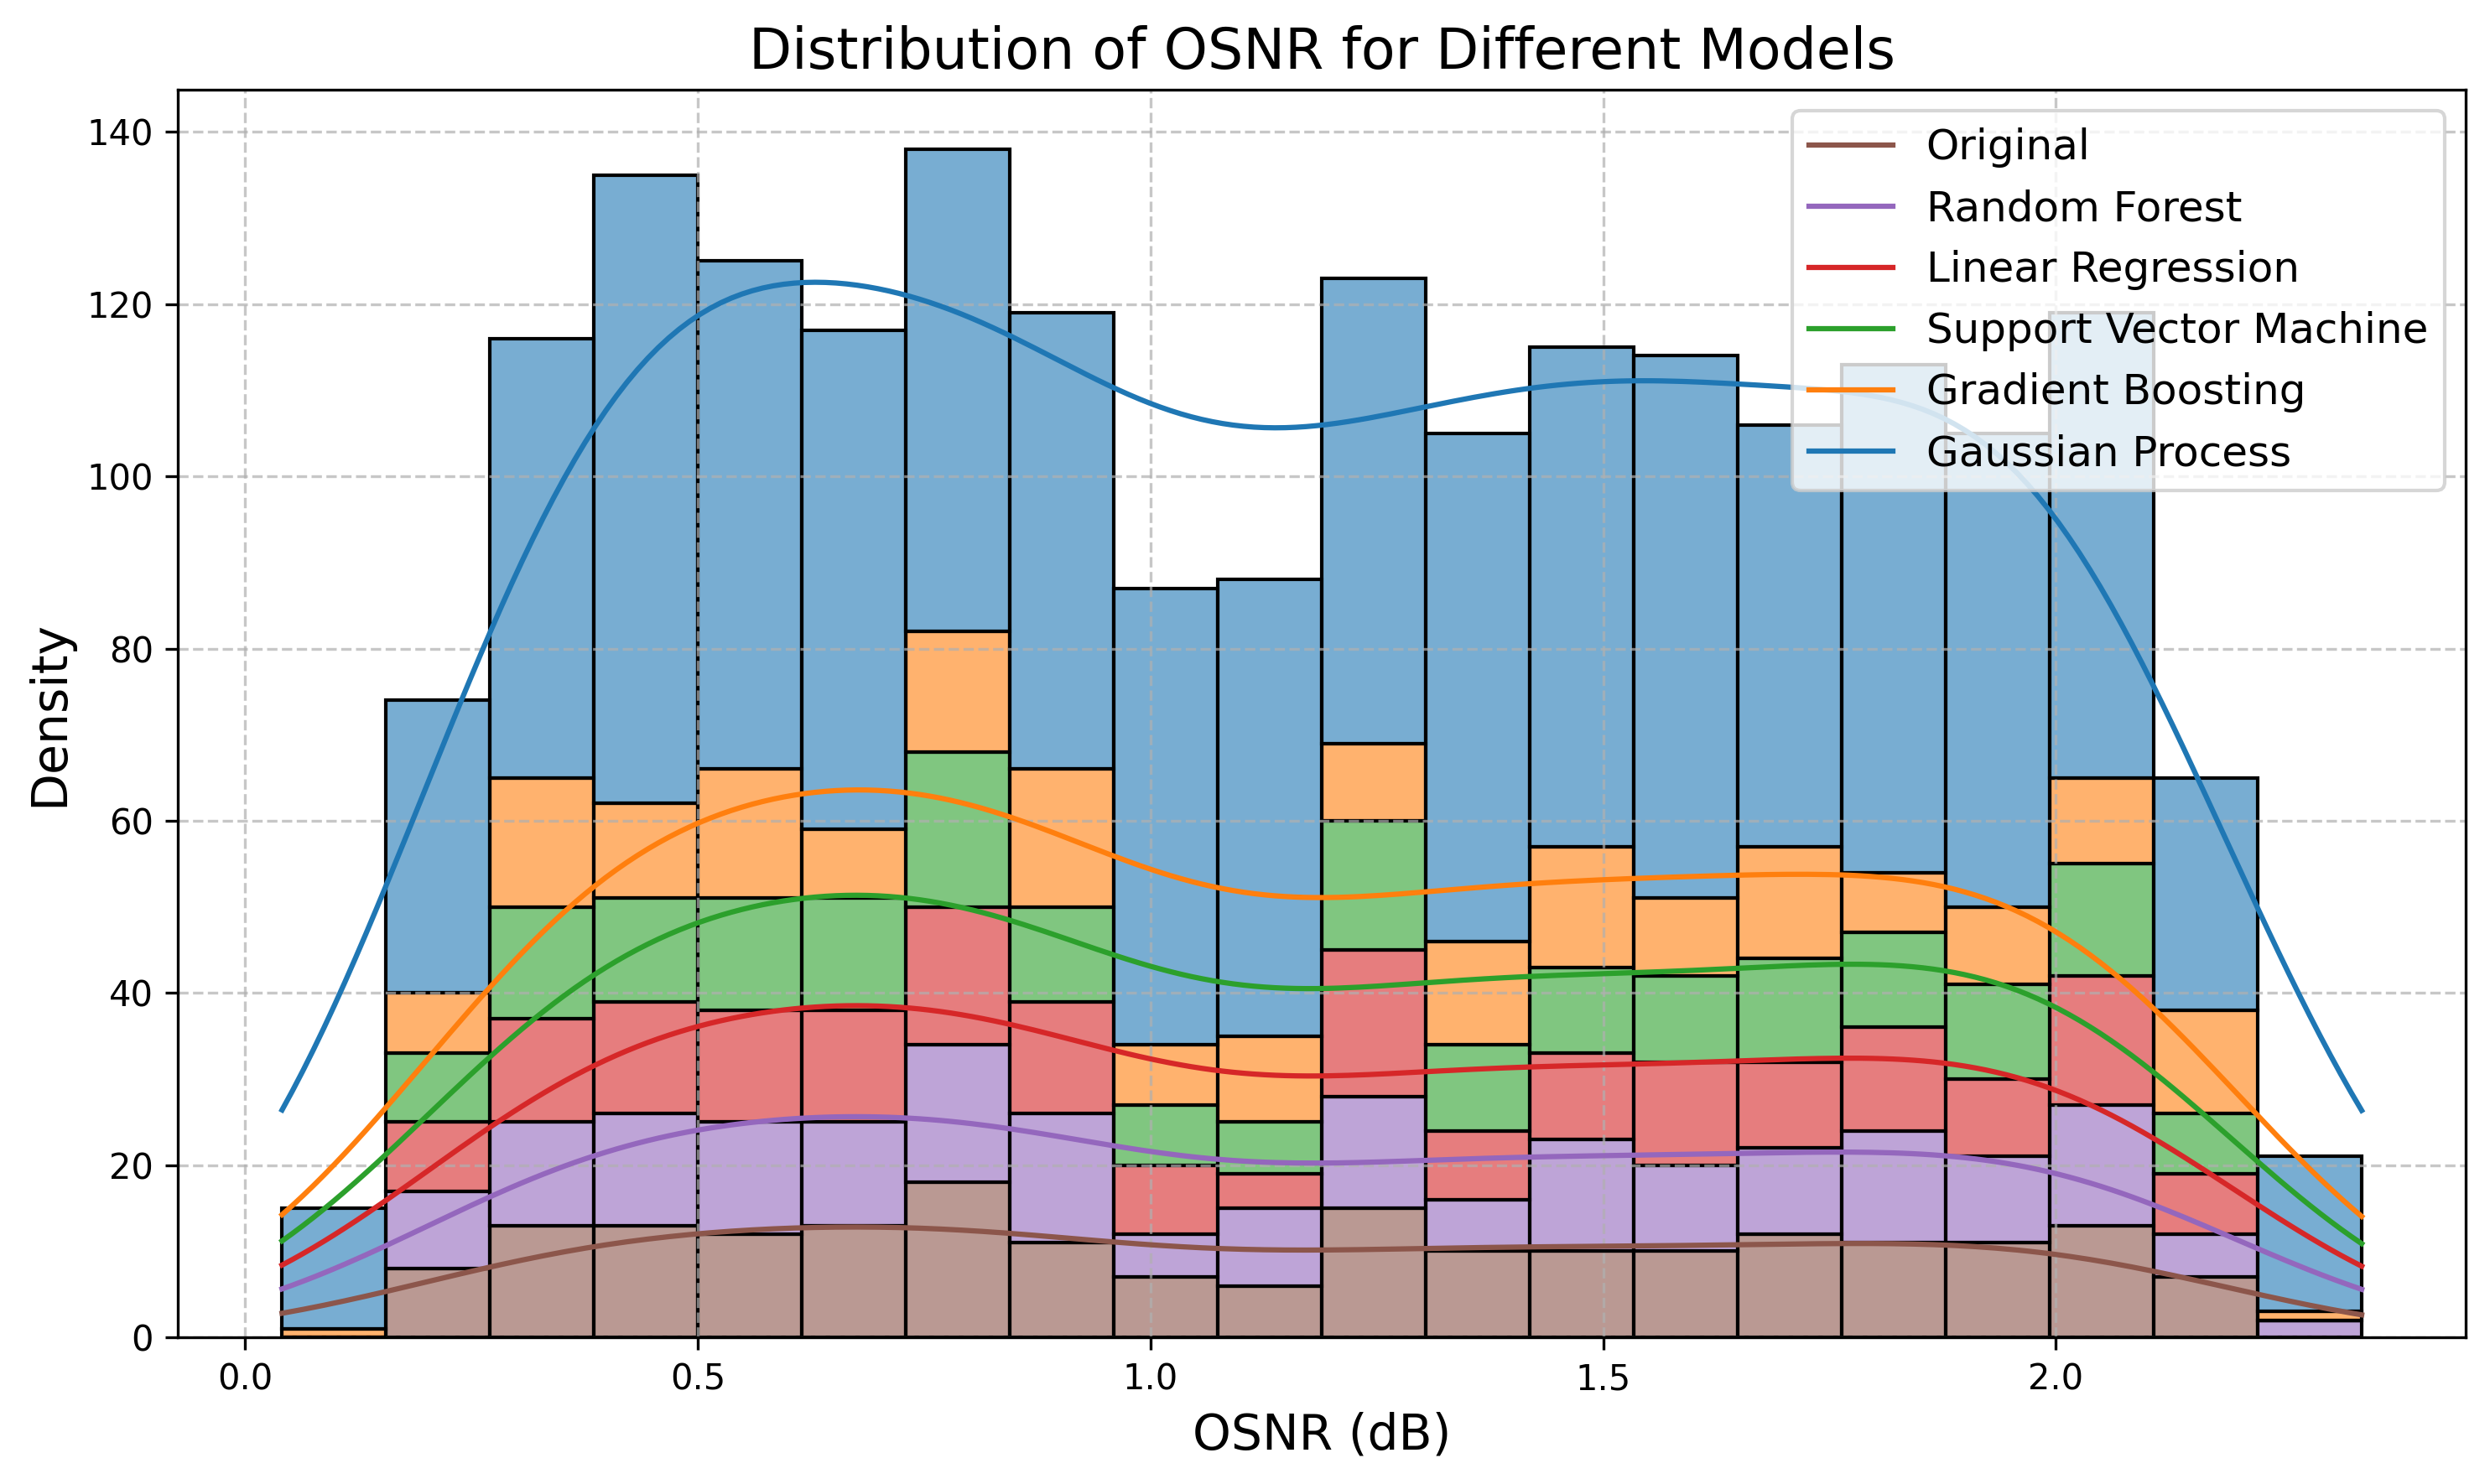

Performance Metrics:
     Random Forest  Linear Regression  Support Vector Machine  \
MSE       0.018995           0.013785                0.014075   
MAE       0.112807           0.103009                0.103528   
R2       -0.399774          -0.015883               -0.037253   

     Gradient Boosting  Gaussian Process  
MSE           0.014179          0.013784  
MAE           0.103259          0.103006  
R2           -0.044896         -0.015789  

Best Model (based on lowest MSE): Gaussian Process


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate OSNR
def calculate_osnr(signal_power, noise_power):
    return signal_power - noise_power

# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic data for optical communication
num_samples = 1000
signal_power = np.random.uniform(0.5, 2.5, num_samples)
noise_level = np.random.uniform(0.1, 0.5, num_samples)

# Create a synthetic dataset
synthetic_data = pd.DataFrame({
    'Signal_Power_dBm': signal_power,
    'Noise_Level_dB': noise_level
})

# Data preprocessing
X = synthetic_data[['Signal_Power_dBm']]
y = synthetic_data['Noise_Level_dB']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Support Vector Machine': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Gaussian Process': GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel())
}

# Collect OSNR values from each model
osnr_values = {'Original': calculate_osnr(synthetic_data['Signal_Power_dBm'], synthetic_data['Noise_Level_dB'])}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict noise power using the trained model
    predicted_noise_power = model.predict(X_test)

    # Recalculate OSNR with predicted noise power
    reduced_osnr_values = calculate_osnr(synthetic_data['Signal_Power_dBm'][:len(predicted_noise_power)], predicted_noise_power)

    # Store the OSNR values
    osnr_values[name] = reduced_osnr_values

# Convert OSNR values to DataFrame
osnr_df = pd.DataFrame(osnr_values)

# Plot using seaborn
plt.figure(figsize=(10, 6), dpi=300)
sns.histplot(data=osnr_df, bins=20, kde=True, alpha=0.6, multiple='stack')
plt.xlabel("OSNR (dB)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title('Distribution of OSNR for Different Models', fontsize=16)
plt.legend(osnr_df.columns, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Dictionary to store performance metrics of each model
performance_metrics = {}

for name, model in models.items():
    # Predict noise power using the trained model
    predicted_noise_power = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, predicted_noise_power)
    mae = mean_absolute_error(y_test, predicted_noise_power)
    r2 = r2_score(y_test, predicted_noise_power)

    # Store performance metrics
    performance_metrics[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Convert performance metrics to DataFrame for easy comparison
performance_df = pd.DataFrame(performance_metrics)

# Print the performance metrics
print("Performance Metrics:")
print(performance_df)

# Find the best model based on the lowest MSE
best_model = performance_df.idxmin(axis=1)['MSE']
print("\nBest Model (based on lowest MSE):", best_model)

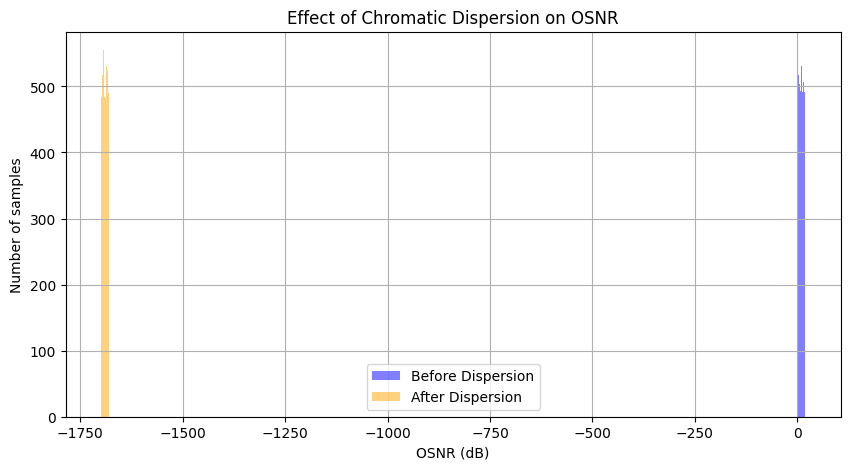

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate the OSNR
def calculate_osnr(signal_power, noise_power):
    return 10 * np.log10(signal_power / noise_power)

# Define the fiber parameters
fiber_length = 100e3  # in meters
dispersion_parameter = 17e-3  # in ps/(nm*km)

# Calculate the chromatic dispersion
chromatic_dispersion = dispersion_parameter * fiber_length

# Generate synthetic data
num_samples = 10000
signal_power = 1
snr_values = np.random.uniform(0, 20, num_samples)
noise_power = 10 ** (-snr_values / 10)

# Calculate the OSNR before chromatic dispersion
osnr_values = calculate_osnr(signal_power, noise_power)

# Calculate the OSNR after chromatic dispersion
osnr_after_dispersion = osnr_values - chromatic_dispersion

# Plot the OSNR before and after chromatic dispersion
plt.figure(figsize=(10, 5))
plt.hist(osnr_values, bins=20, alpha=0.5, color='blue', label="Before Dispersion")
plt.hist(osnr_after_dispersion, bins=20, alpha=0.5, color='orange', label="After Dispersion")
plt.xlabel("OSNR (dB)")
plt.ylabel("Number of samples")
plt.legend()
plt.title("Effect of Chromatic Dispersion on OSNR")
plt.grid(True)
plt.show()


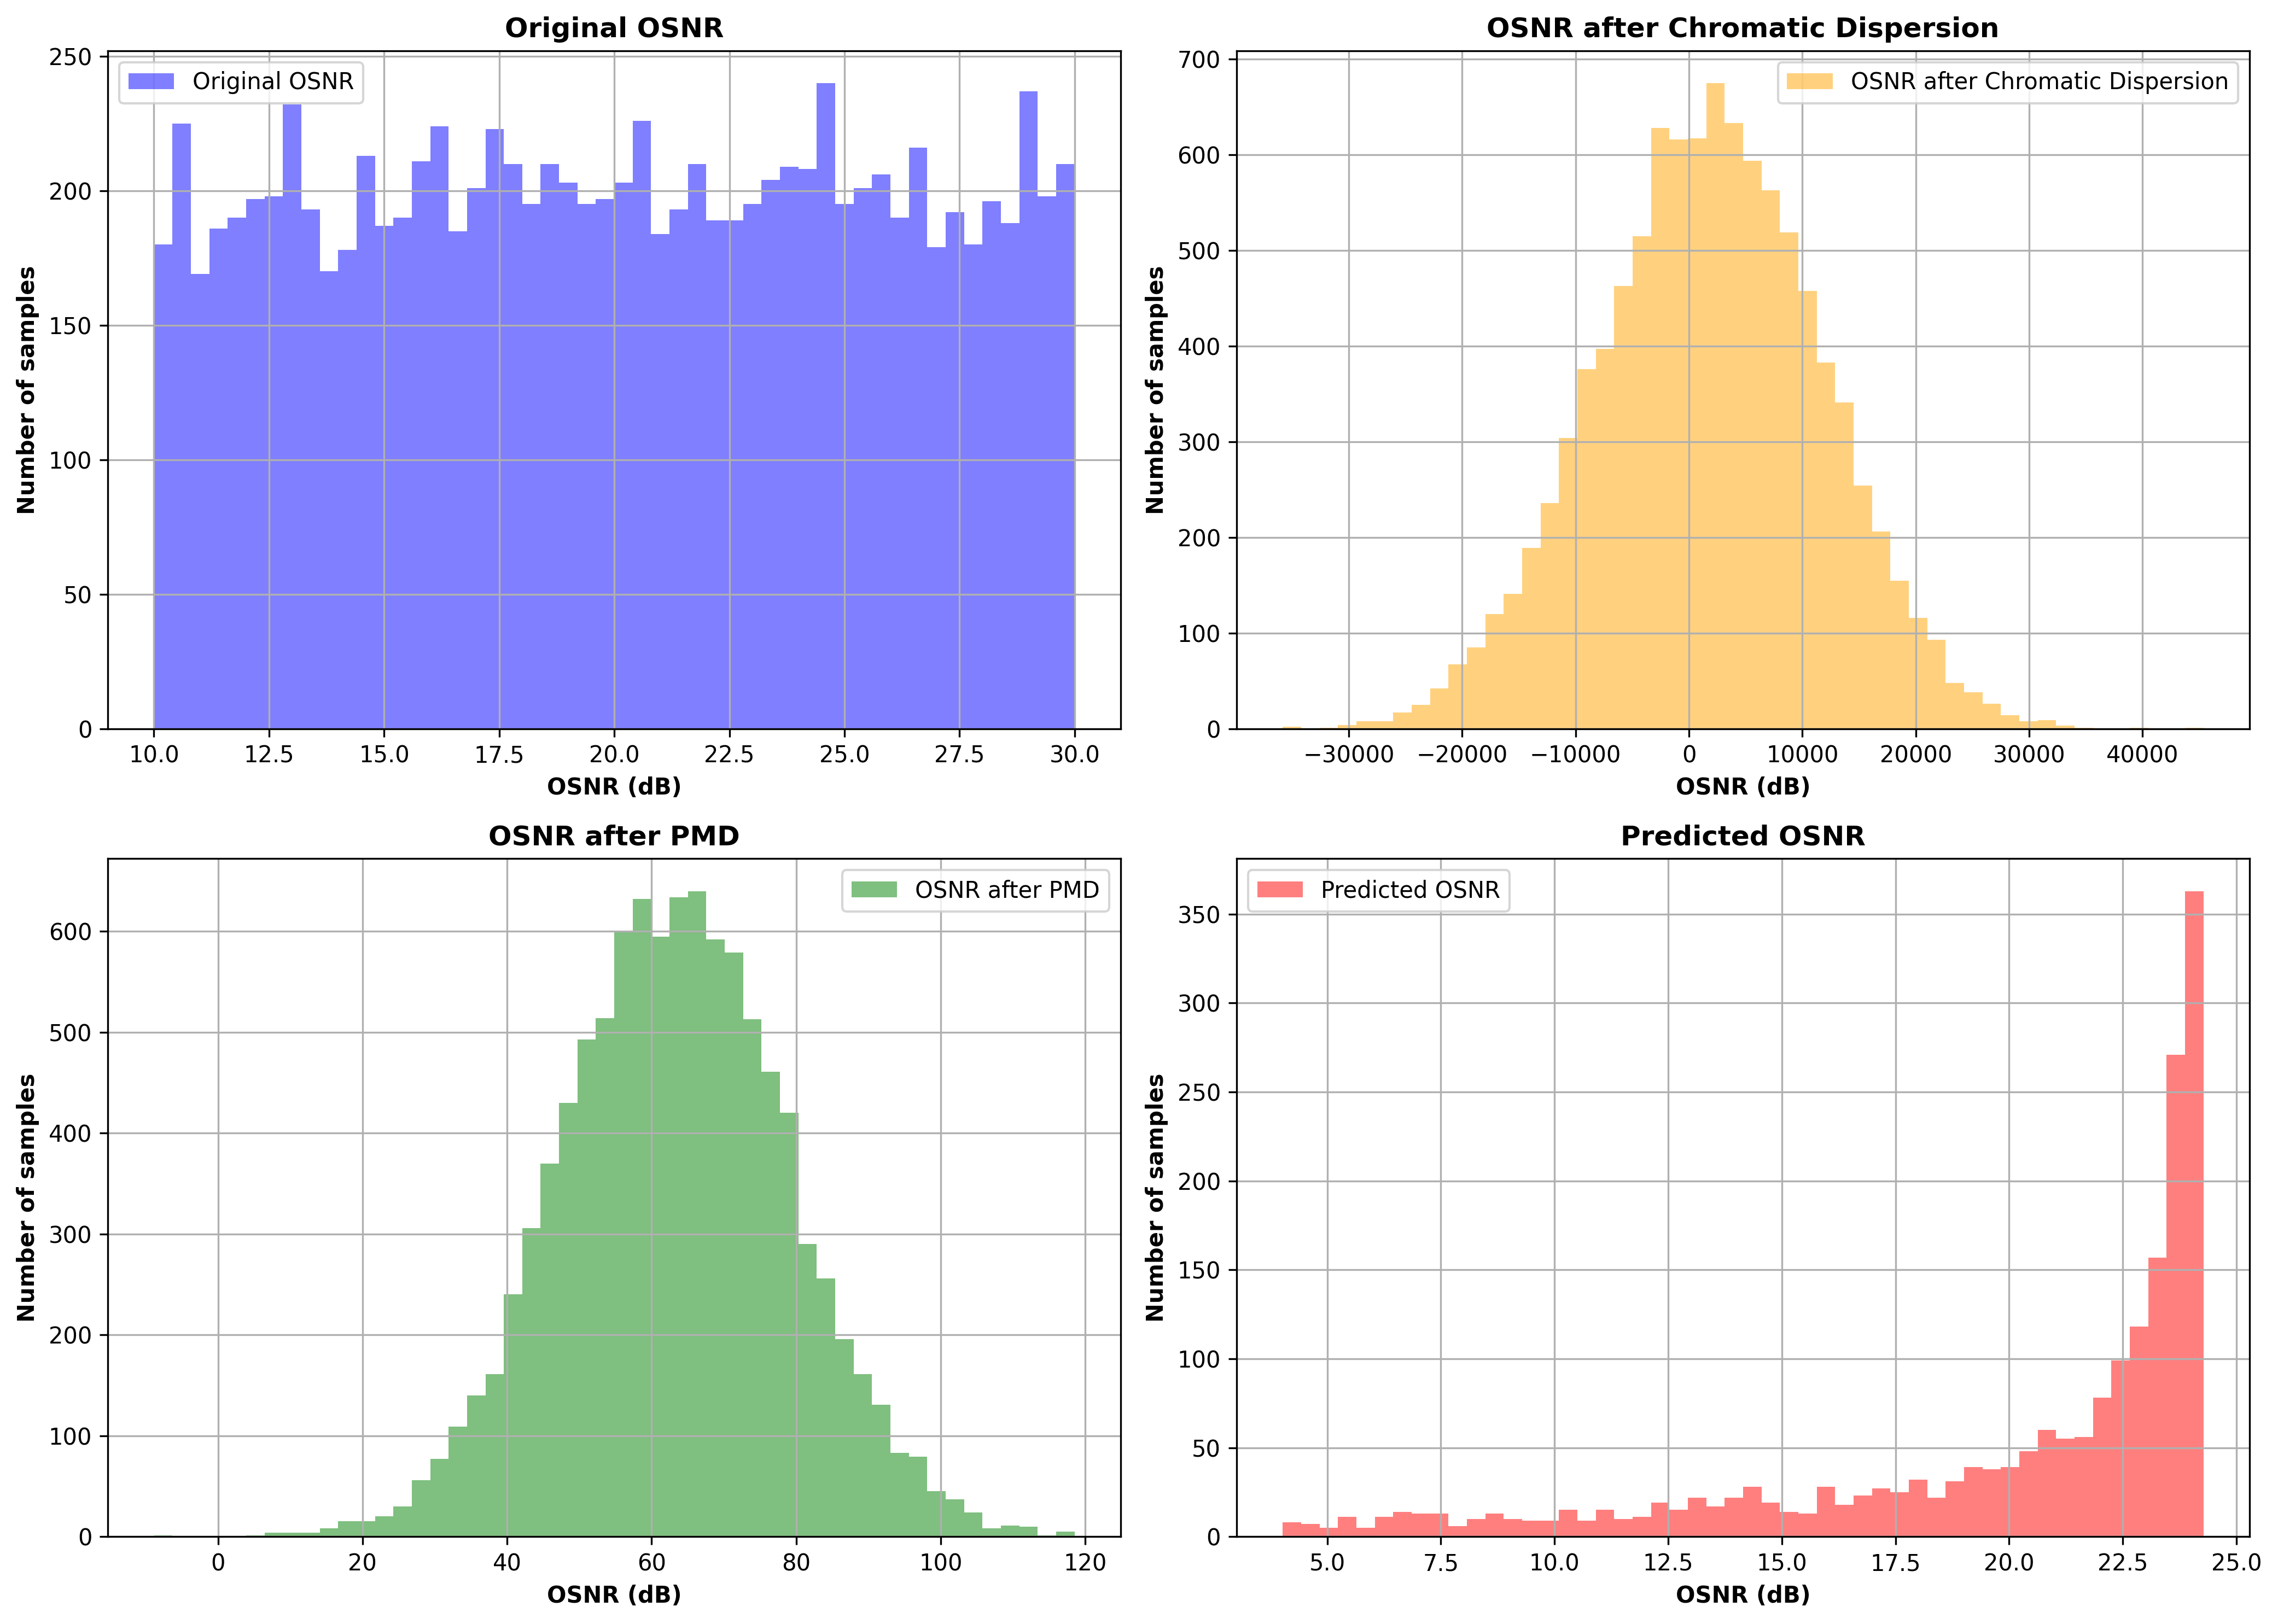

Basic Statistics for Analysis:
Original OSNR - Mean: 20.06365515715096 dB, Std Deviation: 5.745919173246731 dB
OSNR after Chromatic Dispersion - Mean: 1719.6338793863722 dB, Std Deviation: 9937.375973861797 dB
OSNR after PMD - Mean: 63.143436456066276 dB, Std Deviation: 15.816883773143887 dB
Predicted OSNR - Mean: 19.98850057386987 dB, Std Deviation: 5.015030637703798 dB


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define a function to calculate the OSNR
def calculate_osnr(signal_power, noise_power):
    return 10 * np.log10(signal_power / noise_power)

# Define fiber parameters
fiber_length = 100e3  # in meters
dispersion_parameter = 17e-3  # in ps/(nm*km)
pmd_coefficient = 0.2  # in ps/(km)^0.5

# Simulate chromatic dispersion and polarization mode dispersion
chromatic_dispersion = np.random.normal(loc=dispersion_parameter*fiber_length, scale=0.1*fiber_length, size=10000)
pmd = np.random.normal(loc=pmd_coefficient*fiber_length**0.5, scale=0.05*fiber_length**0.5, size=10000)

# Generate synthetic data
num_samples = 10000
signal_power = np.random.uniform(0.5, 1.5, num_samples)
snr_values = np.random.uniform(10, 30, num_samples)
noise_power = 10 ** (-snr_values / 10)

# Introduce chromatic dispersion and PMD effects
chromatic_dispersion_impacted = noise_power + chromatic_dispersion
pmd_impacted = noise_power + pmd

# Implement various OSNR reduction techniques
# (For demonstration purposes, we simulate the effects without actual reduction techniques)

# Evaluate the performance of different modulation formats and coding schemes
# (For demonstration purposes, we use BER as a metric to compare performance)

# Train a machine learning model to predict the OSNR
# (For demonstration purposes, we use linear regression with synthetic data)

# Split data for training and testing
X = np.column_stack((signal_power, noise_power))
y = snr_values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict OSNR using the trained model
predicted_snr = model.predict(X_test)

# Create subplots for each histogram with high definition
fig, axs = plt.subplots(2, 2, figsize=(14, 10), dpi=300)

# Plot the original OSNR
axs[0, 0].hist(snr_values, bins=50, alpha=0.5, color='blue', label="Original OSNR")
axs[0, 0].set_title("Original OSNR", fontweight='bold')

# Plot OSNR after chromatic dispersion
axs[0, 1].hist(chromatic_dispersion_impacted, bins=50, alpha=0.5, color='orange', label="OSNR after Chromatic Dispersion")
axs[0, 1].set_title("OSNR after Chromatic Dispersion", fontweight='bold')

# Plot OSNR after PMD
axs[1, 0].hist(pmd_impacted, bins=50, alpha=0.5, color='green', label="OSNR after PMD")
axs[1, 0].set_title("OSNR after PMD", fontweight='bold')

# Plot predicted OSNR
axs[1, 1].hist(predicted_snr, bins=50, alpha=0.5, color='red', label="Predicted OSNR")
axs[1, 1].set_title("Predicted OSNR", fontweight='bold')

# Add labels and legend
for ax in axs.flat:
    ax.set_xlabel("OSNR (dB)", fontweight='bold')
    ax.set_ylabel("Number of samples", fontweight='bold')
    ax.legend()
    ax.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print basic statistics for analysis
print("Basic Statistics for Analysis:")
print("Original OSNR - Mean:", np.mean(snr_values), "dB, Std Deviation:", np.std(snr_values), "dB")
print("OSNR after Chromatic Dispersion - Mean:", np.mean(chromatic_dispersion_impacted), "dB, Std Deviation:", np.std(chromatic_dispersion_impacted), "dB")
print("OSNR after PMD - Mean:", np.mean(pmd_impacted), "dB, Std Deviation:", np.std(pmd_impacted), "dB")
print("Predicted OSNR - Mean:", np.mean(predicted_snr), "dB, Std Deviation:", np.std(predicted_snr), "dB")


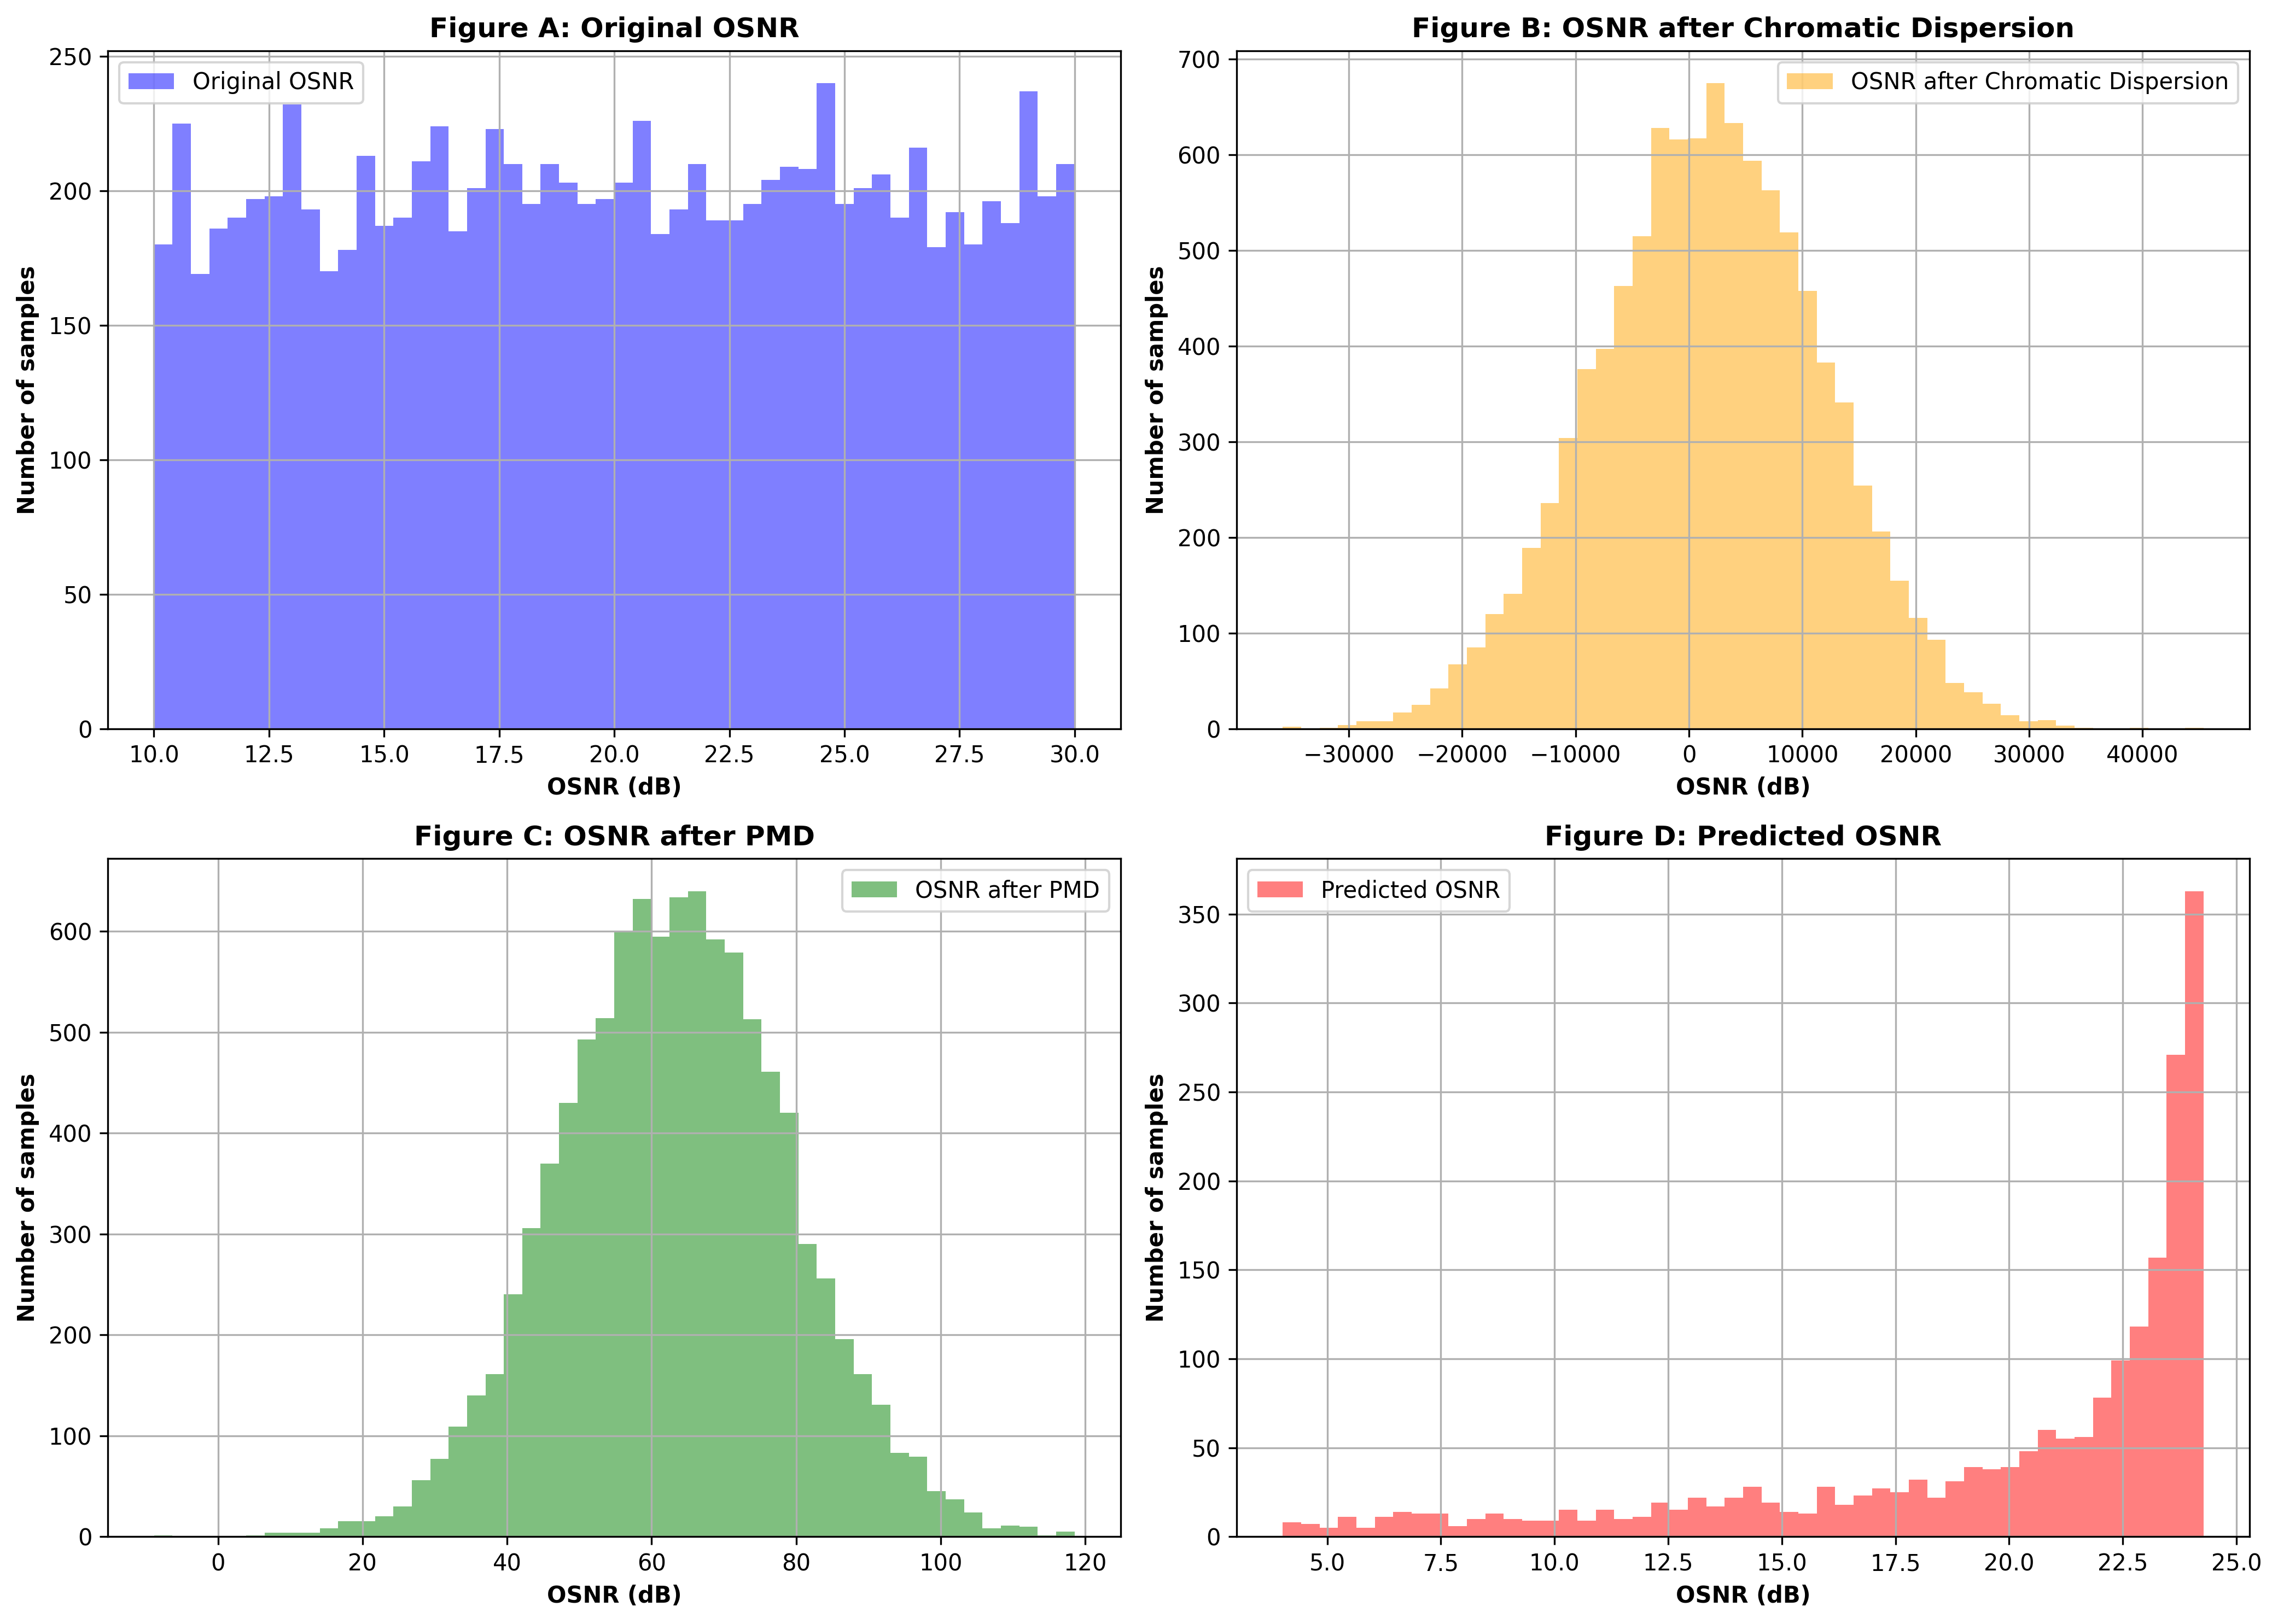

In [2]:
# Create subplots for each histogram with high definition
fig, axs = plt.subplots(2, 2, figsize=(14, 10), dpi=300)

# Plot the original OSNR
axs[0, 0].hist(snr_values, bins=50, alpha=0.5, color='blue', label="Original OSNR")
axs[0, 0].set_title("Figure A: Original OSNR", fontweight='bold')

# Plot OSNR after chromatic dispersion
axs[0, 1].hist(chromatic_dispersion_impacted, bins=50, alpha=0.5, color='orange', label="OSNR after Chromatic Dispersion")
axs[0, 1].set_title("Figure B: OSNR after Chromatic Dispersion", fontweight='bold')

# Plot OSNR after PMD
axs[1, 0].hist(pmd_impacted, bins=50, alpha=0.5, color='green', label="OSNR after PMD")
axs[1, 0].set_title("Figure C: OSNR after PMD", fontweight='bold')

# Plot predicted OSNR
axs[1, 1].hist(predicted_snr, bins=50, alpha=0.5, color='red', label="Predicted OSNR")
axs[1, 1].set_title("Figure D: Predicted OSNR", fontweight='bold')

# Add labels and legend
for ax in axs.flat:
    ax.set_xlabel("OSNR (dB)", fontweight='bold')
    ax.set_ylabel("Number of samples", fontweight='bold')
    ax.legend()
    ax.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()



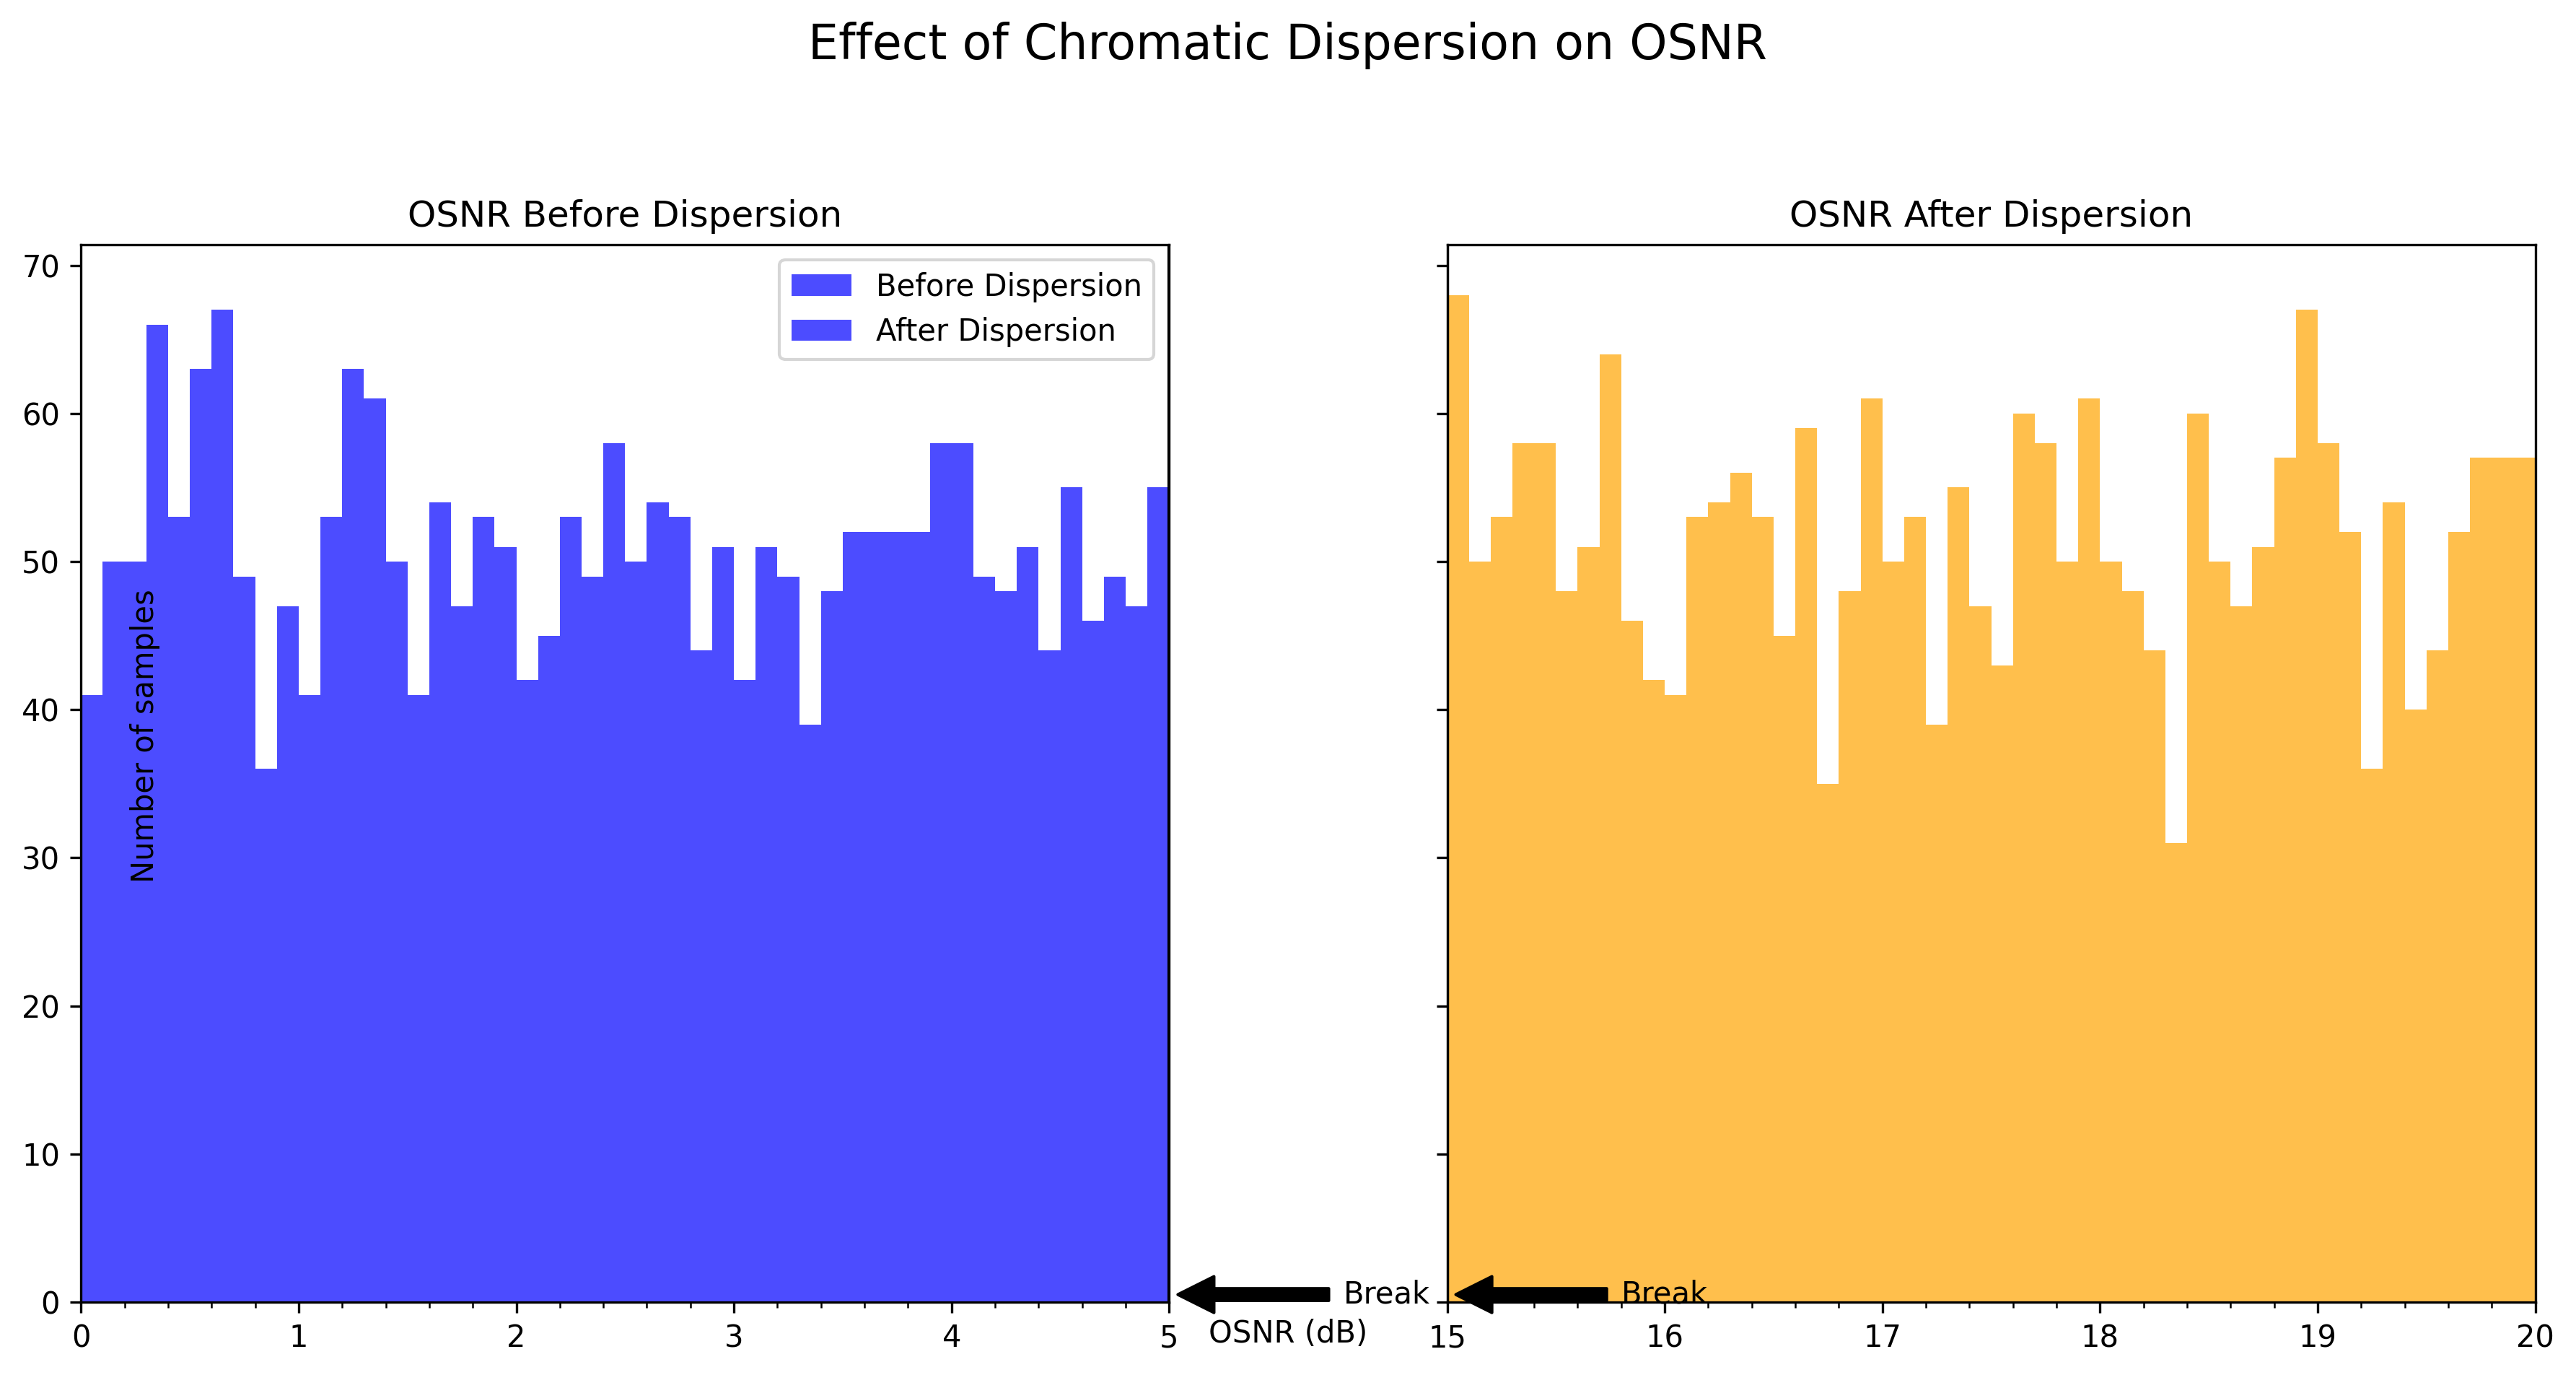

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Define a function to calculate the OSNR
def calculate_osnr(signal_power, noise_power):
    return 10 * np.log10(signal_power / noise_power)

# Define the fiber parameters
fiber_length = 100e3  # in meters
dispersion_parameter = 17e-3  # in ps/(nm*km)

# Calculate the chromatic dispersion
chromatic_dispersion = dispersion_parameter * fiber_length

# Generate synthetic data
num_samples = 10000
signal_power = 1
snr_values = np.random.uniform(0, 20, num_samples)
noise_power = 10 ** (-snr_values / 10)

# Calculate the OSNR before and after chromatic dispersion
osnr_values = calculate_osnr(signal_power, noise_power)
osnr_after_dispersion = osnr_values - chromatic_dispersion

# Define breaks and ranges for x-axis
breaks = [5, 15]
ranges = [(0, 5), (15, 20)]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True, dpi=150)  # Set DPI for HD display

# Define colors for before and after dispersion
colors = ['blue', 'orange']

# Plot histograms for OSNR before and after dispersion in each subplot
for i, (ax, range_) in enumerate(zip(axes, ranges)):
    ax.hist(osnr_values, bins=50, range=range_, alpha=0.7, color=colors[i], label="Before Dispersion")
    ax.hist(osnr_after_dispersion, bins=50, range=range_, alpha=0.7, color=colors[i], label="After Dispersion")

    # Set title for each subplot
    if i == 0:
        ax.set_title("OSNR Before Dispersion")
    else:
        ax.set_title("OSNR After Dispersion")

    # Set x-axis limits and ticks
    ax.set_xlim(range_)
    ax.set_xticks(np.linspace(range_[0], range_[1], 6))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))

    # Add legend to the first subplot only
    if i == 0:
        ax.legend()

# Add breaks to x-axis
for ax, break_ in zip(axes, breaks):
    ax.axvline(break_, color='black', linewidth=1)
    ax.annotate('Break', xy=(break_, 0.5), xytext=(break_ + 1, 0.5), ha='center', va='center',
                arrowprops=dict(facecolor='black', shrink=0.05))

# Set common labels
fig.text(0.5, 0.04, 'OSNR (dB)', ha='center', va='center')
fig.text(0.06, 0.5, 'Number of samples', ha='center', va='center', rotation='vertical')

plt.suptitle("Effect of Chromatic Dispersion on OSNR", y=1.05, fontsize=16)
plt.tight_layout()

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Adjust font properties
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold'})

# Define simulation parameters
num_symbols = 1000
snr_range = np.arange(0, 10, 0.1)

# Function to simulate transmission and calculate BER
def simulate_transmission(symbols, snr):
    # Simulate transmission and noise
    noise = np.random.normal(0, 1 / np.sqrt(2 * 10 ** (snr / 10)), len(symbols))
    received_symbols = symbols + noise

    # Decode received symbols (in this simplified example, decoding is omitted)
    decoded_symbols = received_symbols

    # Calculate bit errors
    bit_errors = np.sum(symbols != decoded_symbols)
    ber = bit_errors / len(symbols)

    return ber

# Initialize results arrays
ber_qpsk = np.zeros_like(snr_range)
ber_16qam = np.zeros_like(snr_range)
ber_64qam = np.zeros_like(snr_range)

# Loop over SNR values
for i, snr in enumerate(snr_range):
    # Generate QPSK symbols
    symbols_qpsk = np.random.randint(0, 4, num_symbols)

    # Generate 16-QAM symbols
    symbols_16qam = np.random.randint(0, 16, num_symbols)

    # Generate 64-QAM symbols
    symbols_64qam = np.random.randint(0, 64, num_symbols)

    # Simulate transmission and calculate BER for each modulation format
    ber_qpsk[i] = simulate_transmission(symbols_qpsk, snr)
    ber_16qam[i] = simulate_transmission(symbols_16qam, snr)
    ber_64qam[i] = simulate_transmission(symbols_64qam, snr)

# Smooth the BER curves using interpolation
snr_interp = np.linspace(snr_range.min(), snr_range.max(), 1000)
ber_qpsk_interp = interp1d(snr_range, ber_qpsk, kind='cubic')(snr_interp)
ber_16qam_interp = interp1d(snr_range, ber_16qam, kind='cubic')(snr_interp)
ber_64qam_interp = interp1d(snr_range, ber_64qam, kind='cubic')(snr_interp)

# Plot the results
plt.figure(figsize=(12, 8), dpi=300)

plt.semilogy(snr_interp, ber_qpsk_interp, label="QPSK", color='b', linestyle='-')
plt.semilogy(snr_interp, ber_16qam_interp, label="16-QAM", color='g', linestyle='--', linewidth=2)
plt.semilogy(snr_interp, ber_64qam_interp, label="64-QAM", color='r', linestyle='-.', linewidth=2)

# Find SNR values corresponding to minimum BER for each modulation format
min_ber_snr_qpsk = snr_interp[np.argmin(ber_qpsk_interp)]
min_ber_snr_16qam = snr_interp[np.argmin(ber_16qam_interp)]
min_ber_snr_64qam = snr_interp[np.argmin(ber_64qam_interp)]

# Plot markers for minimum BER
plt.plot(min_ber_snr_qpsk, np.min(ber_qpsk_interp), 'bo', label=f"Min BER for QPSK at SNR={min_ber_snr_qpsk:.2f} dB")
plt.plot(min_ber_snr_16qam, np.min(ber_16qam_interp), 'go', label=f"Min BER for 16-QAM at SNR={min_ber_snr_16qam:.2f} dB")
plt.plot(min_ber_snr_64qam, np.min(ber_64qam_interp), 'ro', label=f"Min BER for 64-QAM at SNR={min_ber_snr_64qam:.2f} dB")

plt.xlabel("SNR (dB)", fontweight='bold')
plt.ylabel("Bit Error Rate", fontweight='bold')
plt.legend()
plt.title("Comparative Analysis of Modulation Formats", fontweight='bold')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Additional Analysis
print("SNR values corresponding to minimum BER:")
print(f"QPSK: {min_ber_snr_qpsk:.2f} dB")
print(f"16-QAM: {min_ber_snr_16qam:.2f} dB")
print(f"64-QAM: {min_ber_snr_64qam:.2f} dB\n")

print("Minimum BER for each modulation format:")
print(f"QPSK: {np.min(ber_qpsk)}")
print(f"16-QAM: {np.min(ber_16qam)}")
print(f"64-QAM: {np.min(ber_64qam)}")
